Thanks for:

notebook: https://www.kaggle.com/maunish/osic-super-cool-eda-and-pytorch-baseline#6-Simple-Pytorch-Model


notebook:https://www.kaggle.com/ulrich07/osic-keras-starter-with-custom-metrics

dataset: https://www.kaggle.com/rashmibanthia/osic-pulmonary-jpg

past compe used CT image:
https://qiita.com/inoichan/items/f5a43c8f0e2988cc8452
https://www.kaggle.com/c/rsna-intracranial-hemorrhage-detection/discussion/117223

other pytorch notebook:
https://www.kaggle.com/havinath/eda-observations-visualizations-pytorch

metric:
https://www.kaggle.com/rohanrao/osic-understanding-laplace-log-likelihood

loss:
https://medium.com/the-artificial-impostor/quantile-regression-part-2-6fdbc26b2629

Learning rate:
https://nonbiri-tereka.hatenablog.com/entry/2016/03/10/073633

Custom Bachnorm:
 https://tantabi.com/2020/02/06/batchnormalization/

Dicom:
https://qiita.com/fukuit/items/ed163f9b566baf3a6c3f


segmentation:
https://www.kaggle.com/unforgiven/osic-comprehensive-eda

threhold:
https://carp.cc.it-hiroshima.ac.jp/~tateyama/Lecture/AppEx/PythonImageIOScikit.html

mloss:
https://www.kaggle.com/maunish/osic-super-cool-eda-and-pytorch-baseline/notebook#6-Simple-Pytorch-Model

In [1]:
DAY = "20201001"

#Version = "v1" # Starter code
#Version = "v2" # bug check
#Version = "v3" # change evaluation function
#Version = "v4" # tublar data, adress Nan
#Version = "v5" # dicom LB: -6.9792 CV: 160
#Version = "v6" # dicom image processing, time over(GPU→CPU)
#Version = "v7" # Create feature 
#Version = "v8" # image prosessing
#Version = "v9" # image prosessing → create dataset LB: -24.7981 CV: 235.33
#Version = "v10" # adjust models parameters(increase CT image weight 250→500), mloss , imageise 254→512, batch size 32→16, augmentation
#Version = "v11" # Leaning rate 0.1*0.9*epoch, Create meta feature #LB:-24.7981???, bestCV: 114.23
#Version = "v12" # loss = (0.8*loss) + (0.2*-score(outputs, target)), model add [MyBatchNorm1d(250),nn.ReLU(), nn.Dropout(p=0.1)]
#Version = "v13" # classfication based on cluster
#Version = "v14" # Create train dataset based on tawara's notebook 
#Version = "v15" # Add middle layer feature extraction
Version = "v16" # Add middle layer feature extraction

# Set enviroment

In [2]:
! pip install pymc3==3.9.3

     |████████████████████████████████| 1.9MB 5.9MB/s 
     |████████████████████████████████| 1.5MB 52.5MB/s 
     |████████████████████████████████| 727kB 52.2MB/s 
     |████████████████████████████████| 4.3MB 63.4MB/s 
     |████████████████████████████████| 102kB 15.4MB/s 
     |████████████████████████████████| 296kB 66.9MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=faff9331b3497694eff095bc2e6cbf0a0e79aab90583ee8b11f56cddf6e0e249
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars
  Found existing installation: xarray 0.15.1
    Uninstalling xarray-0.15.1:
      Successfully uninstalled xarray-0.15.1
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7


In [3]:
# Install Miniconda
! wget https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh && bash Miniconda3-latest-Linux-x86_64.sh -bfp /usr/local
! conda update conda -y -
! source /usr/local/etc/profile.d/conda.sh
! conda init

--2020-10-02 02:29:30--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2020-10-02 02:29:30--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93052469 (89M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  88.74M   196MB/s    in 0.5s    

2020-10-02 02:29:30 (196 MB/s) - ‘Miniconda3-latest-Linux

In [4]:
! conda install -c conda-forge python=3.7 -y
! conda install -c conda-forge gdcm pydicom -y

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

Solving environment: \ | / - \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotlipy-0.7.0             |py37h8f50634_1000         346 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py37hc8dfbb8_0         151 KB  conda-forge
    cffi-1.14.3                |   py37he30daa8_0         223 KB
    chardet-3.0.4              |py37hc8dfbb8_1007         170 KB  conda-forge
    conda-4.8.5                |   py37hc8dfbb8_1         3.0 MB  conda-forge
    conda-package-handling-1.7.0|   py37h8f50

In [5]:
from google.colab import drive
drive.mount('/content/drive')
!ls drive/My\ Drive/Kaggle/

Mounted at /content/drive
Bengali.AI_Handwritten_Grapheme_Classification
global-wheat-detection
IEEE
Ion_Switching_University_of_Liverpool
kaggle.json
m5-forecasting-accuracy
Melanoma_classification
osic-pulmonary-fibrosis-progression
PANDA
Plant_Pathology_2020
Pneumothorax_Segmentation
utils


In [6]:
%%time
#Set Path

_PATH="/content/drive/'My Drive'/Kaggle/osic-pulmonary-fibrosis-progression"

! ls -all $_PATH
! chmod -R 777 $_PATH/input/
! mkdir -p $_PATH/output/$DAY

total 12
drwx------ 2 root root 4096 Jul  9 15:59 input
drwx------ 2 root root 4096 Sep  5 15:55 output
drwx------ 2 root root 4096 Sep  5 15:55 script
CPU times: user 611 ms, sys: 107 ms, total: 718 ms
Wall time: 4min 49s


In [7]:
import os
import sys

sys.path = ['/content/drive/My Drive/Kaggle/utils/EfficientNet-PyTorch/EfficientNet-PyTorch-master'] + sys.path 
sys.path

['/content/drive/My Drive/Kaggle/utils/EfficientNet-PyTorch/EfficientNet-PyTorch-master',
 '',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/usr/local/lib/python3.7/site-packages/']

# Import modules

In [8]:
import albumentations
import copy
import cv2
from collections import defaultdict
import gdcm

from efficientnet_pytorch import model as enet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
import pydicom
import pymc3 as pm

import random

import sklearn
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,PowerTransformer
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline

from skimage import exposure

import time
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import RandomSampler, SequentialSampler

print("PyTorch Version: ",torch.__version__)
print(f"sklern: {sklearn.__version__}")
print('Running on PyMC3 v{}'.format(pm.__version__))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

PyTorch Version:  1.6.0+cu101
sklern: 0.22.2.post1
Running on PyMC3 v3.9.3
cuda


In [9]:
random_seed = 42

def seed_everything(seed):
    """
    Seeds basic parameters for reproductibility of results
    
    Arguments:
        seed {int} -- Number of the seed
    """
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(random_seed)

# Config

In [10]:
n_epochs = 9999
train_bs = 32
valid_bs = 32
test_bs = 16

SIZE = 256
Learning_rate = 0.1

In [11]:
data_dir = "/content/drive/My Drive/Kaggle/osic-pulmonary-fibrosis-progression/input/"
output_dir = f"/content/drive/My Drive/Kaggle/osic-pulmonary-fibrosis-progression/output/{DAY}/"

train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))
submission = pd.read_csv(os.path.join(data_dir, 'sample_submission.csv'))

train_image_folder = os.path.join(data_dir+'train')
test_image_folder = os.path.join(data_dir+'test')

kernel_type = 'train_effnet_b0'
enet_type = 'efficientnet-b0'
ID = 'Patient_Week'

In [12]:
train

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker
...,...,...,...,...,...,...,...
1544,ID00426637202313170790466,13,2712,66.594637,73,Male,Never smoked
1545,ID00426637202313170790466,19,2978,73.126412,73,Male,Never smoked
1546,ID00426637202313170790466,31,2908,71.407524,73,Male,Never smoked
1547,ID00426637202313170790466,43,2975,73.052745,73,Male,Never smoked


# Model

In [13]:
pretrained_model = {'efficientnet-b0': '/content/drive/My Drive/Kaggle/utils/EfficientNet-PyTorch/efficientnet-b0-08094119.pth'}
pretrained_model 

{'efficientnet-b0': '/content/drive/My Drive/Kaggle/utils/EfficientNet-PyTorch/efficientnet-b0-08094119.pth'}

In [14]:
class MyBatchNorm1d(nn.BatchNorm1d):
    def __init__(self, *kargs, **kwargs):
        super(MyBatchNorm1d, self).__init__(*kargs, **kwargs)

    def forward(self, input):

        self.running_var.data = torch.round(self.running_var.data)
        
        out = F.batch_norm(input, self.running_mean, self.running_var,self.weight, self.bias, self.training, self.momentum, self.eps)
        
        return out

In [15]:
class enetv2(nn.Module):
    def __init__(self, backbone, n_features: int):
        super(enetv2, self).__init__()
        self.enet = enet.EfficientNet.from_name(backbone)
        self.enet.load_state_dict(torch.load(pretrained_model[backbone]))
        
        self.cnn = nn.Sequential(nn.Linear(self.enet._fc.in_features, 250, bias=True),
                                 MyBatchNorm1d(250),
                                 nn.ReLU(),
                                 nn.Dropout(p=0.1)
                                 )

        self.meta = nn.Sequential(nn.Linear(n_features, 500, bias=True),
                                  MyBatchNorm1d(500),
                                  nn.ReLU(),
                                  nn.Dropout(p=0.25),
                                  nn.Linear(500, 250),  
                                  MyBatchNorm1d(250),
                                  nn.ReLU(),
                                  nn.Dropout(p=0.25)
                                  )
        
        self.enet._fc = nn.Identity()
        self.out = nn.Linear(250 + 250, 3)
        
    def extract(self, x):
        return self.enet(x)

    def forward(self, inputs):
        x, meta = inputs
        x = self.extract(x)
        x = self.cnn(x)
        meta = self.meta(meta)
        x = torch.cat((x, meta), 1)
        out = self.out(x)
        
        return out

# Dataset

In [16]:
class OsciDataset(Dataset):
    
  def __init__(self, image_paths, data_dic, targets, augmentations=None, meta_features = None):
      """
        :param image_paths: list of paths to images
        :param targets: numpy array
        :param resize: tuple or None
        :param augmentations: albumentations augmentations
      """
      self.image_paths = image_paths
      self.data_dic = data_dic
      self.targets = targets
      self.augmentations = augmentations
      self.meta_features = meta_features

  def __len__(self):
      return len(self.image_paths)

  def get_targets(self):
      return list(self.targets)

  def __getitem__(self, idx):
      img = self.data_dic[self.image_paths[idx]]
      
      if self.augmentations is not None:
          augmented = self.augmentations(image=img)
          img = augmented["image"]
            
      if self.meta_features is not None:
        meta = self.meta_features[idx]
        meta = torch.tensor(meta)
        
      stacked_img = img.transpose(2, 0, 1)
      
      targets = self.targets[idx]

      return {
            "image": (torch.tensor(stacked_img), meta),
            "targets": torch.tensor(targets),
        }


# Augmentations

In [17]:
train_aug = albumentations.Compose([
    albumentations.Cutout(num_holes=24, max_h_size=8, max_w_size=8, always_apply=True),
    albumentations.ShiftScaleRotate(shift_limit=0.0, scale_limit=(0.0, 0.1), rotate_limit=(-45, 45), p=1.0),
    albumentations.Transpose(p=0.7),
    albumentations.VerticalFlip(p=0.7),
    albumentations.HorizontalFlip(p=0.7),
    albumentations.RandomBrightness(limit=0.1, p=0.7),
    albumentations.RandomContrast(limit=0.1, p=0.7),
    ])

valid_aug = albumentations.Compose([])

# CT images extraction

In [18]:
#https://www.kaggle.com/unforgiven/osic-comprehensive-eda

import scipy.ndimage
from skimage import morphology
from skimage import measure
from skimage.filters import threshold_otsu, median
from scipy.ndimage import binary_fill_holes
from skimage.segmentation import clear_border
from scipy.stats import describe

def load_scan(dicom_dir):
  files = os.listdir(dicom_dir)  
  files.sort(key=lambda x: (int(x[:-4]), x[:-3]))
  dcms = []
  len_files = len(files)

  if len_files < 15:
    Point = 2*len(files)//10+2
    dicom_file = os.path.join(dicom_dir, files[Point])
    dcms.append(dicom_file)

  elif len_files < 33: # 25% percentile
    Point = 3*len(files)//10
    Range = 3
    for file in files[Point: Point+Range]:
      dicom_file = os.path.join(dicom_dir, file)
      dcms.append(dicom_file)

  elif len_files > 500: # 75% percentile
    Point = 6*len(files)//10
    Range = 7
    for file in files[Point: Point+Range]:
      dicom_file = os.path.join(dicom_dir, file)
      dcms.append(dicom_file)
  else:
    Point = 4*len(files)//10
    Range = 5
    for file in files[Point: Point+Range]:
      dicom_file = os.path.join(dicom_dir, file)
      dcms.append(dicom_file)
      
  slices = []
  for scan in  dcms:
        with pydicom.dcmread(scan) as s:
            slices.append(s)
    
  slices.sort(key = lambda x: int(x.InstanceNumber))

  try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
  except:
        try:
            slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        except:
            slice_thickness = slices[0].SliceThickness
    
  for s in slices:
        s.SliceThickness = slice_thickness
        
  return slices

def get_pixels_hu(slices):
    imags = np.stack([s.pixel_array for s in slices])
    # Convert to int16 (from sometimes int16), 
    # should be possible as values should always be low enough (<32k)
    imags = imags.astype(np.int16)
    # Set outside-of-scan pixels to 1
    # The intercept is usually -1024, so air is approximately 0
    if slices[0].RescaleIntercept == -1024:
       imags[imags <= -1000] = 0
    
    # Convert to Hounsfield units (HU)
    intercept = slices[0].RescaleIntercept
    slope = slices[0].RescaleSlope
    center = slices[0].WindowCenter

    try:thresh = center*0.9
    except:thresh = center[0]*0.9
    
    if slope != 1:
        imags = slope * image.astype(np.float64)
        imags = image.astype(np.int16)
        
    imags += np.int16(intercept)

    imags = np.array(imags, dtype=np.int16)


    binaries = []
    for imag in imags:
      binary = imag <= thresh
      binaries.append(binary)
    mean_img = np.mean(binaries, axis=0)
    
    return mean_img

def conv_img(mean_img):
  h, w = mean_img.shape[:2]
  if h == w:
    h1, h2 = int(h * 0.33), int(h * 0.7)
    w1, w2 = int(w * 0.13), int(w * 0.87)
  if h > w:
    a, b = h/w, w/h
    h1, h2 = int(h * 0.3*a), int(h * 0.7*b)
    w1, w2 = int(w * 0.13), int(w * 0.87)
  if h < w:
    a, b = w/h, h/w
    h1, h2 = int(h * 0.4), int(h * 0.67)
    w1, w2 = int(w * 0.3*a), int(w * 0.8*b)
    

  mean_img = mean_img[h1: h2, w1: w2]
  mean_img = cv2.resize(mean_img, (SIZE, SIZE))

  stacked_img = np.stack((mean_img,)*3, -1)
  stacked_img = exposure.equalize_adapthist(stacked_img)
  

  return stacked_img

In [ ]:
from collections import defaultdict

data_dic = defaultdict()
tmp_df = train.reset_index(drop=True)

for pt_id in tqdm(set(list(tmp_df.Patient))):
  dicom_dir = os.path.join(train_image_folder, pt_id)
  patient = load_scan(dicom_dir)
  mean_img = get_pixels_hu(patient)
  stacked_img = conv_img(mean_img)
  data_dic[dicom_dir]=stacked_img

In [ ]:
#ファイルとして保存(辞書)
import pickle
with open("osci_train_ct_image_dict.256.pkl","wb") as f:
    pickle.dump(data_dic, f)

In [ ]:
output_dir

'/content/drive/My Drive/Kaggle/osic-pulmonary-fibrosis-progression/output/20200930/'

In [ ]:
#!mv "osci_train_ct_image_dict.256.pkl" /content/drive/"My Drive"/Kaggle/osic-pulmonary-fibrosis-progression/output/20200930/

In [19]:
#ファイルの読み込み
import pickle

with open("/content/drive/My Drive/Kaggle/osic-pulmonary-fibrosis-progression/output/20200930/" + "osci_train_ct_image_dict.256.pkl", 'rb') as f:
    data_dic = pickle.load(f)

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([3, 256, 256])


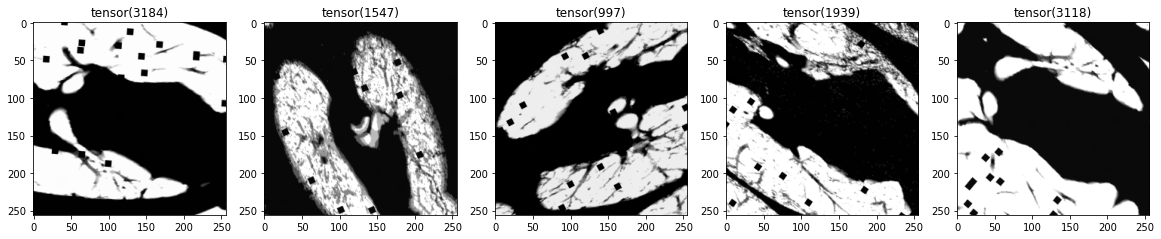

In [20]:
tmp_pt_id = train.Patient.values.tolist()
tmp_images_dir = [os.path.join(train_image_folder, tmp_pt_id[i]) for i in range(len(tmp_pt_id))]
tmp_targets = train.FVC.values
tmp_meta = np.array(train['Weeks'].values, dtype=np.float32)

dataset_show = OsciDataset(image_paths = tmp_images_dir, data_dic=data_dic, targets=tmp_targets, augmentations=train_aug, meta_features = tmp_meta)

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

fig, axes = plt.subplots(1, 5)
for i in range(5):
  idx = np.random.randint(0, len(dataset_show))
  data = dataset_show[idx]
  imag, _ = data["image"]
  print(imag.shape)
  axes[i].imshow(imag.transpose(0, 1).transpose(1, 2).squeeze())
  axes[i].set_title(data["targets"])

# Metric

This competition is evaluated on a modified version of the Laplace Log Likelihood. In medical applications, it is useful to evaluate a model's confidence in its decisions. Accordingly, the metric is designed to reflect both the accuracy and certainty of each prediction.

For each true FVC measurement, you will predict both an FVC and a confidence measure (standard deviation \( \sigma \)). The metric is computed as:

$$ \sigma_{clipped} = max(\sigma, 70), $$

$$ \Delta = min ( |FVC_{true} - FVC_{predicted}|, 1000 ), $$

$$ metric = - \frac{\sqrt{2} \Delta}{\sigma_{clipped}} - \ln ( \sqrt{2} \sigma_{clipped} ). $$

The error is thresholded at 1000 ml to avoid large errors adversely penalizing results, while the confidence values are clipped at 70 ml to reflect the approximate measurement uncertainty in FVC. The final score is calculated by averaging the metric across all test set Patient_Weeks (three per patient). Note that metric values will be negative and higher is better.

In [21]:
## evaluation metric function
def score(outputs, targets):
        d = 1e-8
        actual_fvc = torch.reshape(targets, outputs[:, 1].shape)
        predicted_fvc = outputs[:, 1]

        confidence = outputs[:, 2] - outputs[:, 0]
        sd_clipped = torch.clamp(confidence, min=70)

        delta = torch.abs(actual_fvc - predicted_fvc)
        delta = torch.clamp(delta, max=1000)
        sqrt_2 = torch.sqrt(torch.tensor([2.])).to(device)

        metrics = torch.div(-sqrt_2 * delta + d, sd_clipped + d) - torch.log(sqrt_2 * sd_clipped + d)
        
        return torch.mean(metrics)

# Loss

In [22]:
class QuantileLoss(nn.Module):
    def __init__(self, quantiles=(0.2, 0.5, 0.8)):
        super().__init__()
        self.quantiles = quantiles
        
    def forward(self, outputs, target):
        assert outputs.size(0) == target.size(0)
        losses = []
        for i, q in enumerate(self.quantiles):
            errors = target - outputs[:, i]
            losses.append(torch.max((q-1)*errors, q*errors).unsqueeze(1))
        loss = torch.mean(torch.sum(torch.cat(losses, dim=1), dim=1))
        return loss

#Preprocess Meta Data

In [23]:
train

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker
...,...,...,...,...,...,...,...
1544,ID00426637202313170790466,13,2712,66.594637,73,Male,Never smoked
1545,ID00426637202313170790466,19,2978,73.126412,73,Male,Never smoked
1546,ID00426637202313170790466,31,2908,71.407524,73,Male,Never smoked
1547,ID00426637202313170790466,43,2975,73.052745,73,Male,Never smoked


In [24]:
tr = train.copy()
train[ID] = train['Patient'].astype(str) + '_' + train['Weeks'].astype(str)
print(train.shape)
train

(1549, 8)


,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus,Patient_Week
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker,ID00007637202177411956430_-4
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker,ID00007637202177411956430_5
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker,ID00007637202177411956430_7
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker,ID00007637202177411956430_9
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker,ID00007637202177411956430_11
...,...,...,...,...,...,...,...,...
1544,ID00426637202313170790466,13,2712,66.594637,73,Male,Never smoked,ID00426637202313170790466_13
1545,ID00426637202313170790466,19,2978,73.126412,73,Male,Never smoked,ID00426637202313170790466_19
1546,ID00426637202313170790466,31,2908,71.407524,73,Male,Never smoked,ID00426637202313170790466_31
1547,ID00426637202313170790466,43,2975,73.052745,73,Male,Never smoked,ID00426637202313170790466_43


In [25]:
# construct train input

output = pd.DataFrame()
gb = train.groupby('Patient')
tk0 = tqdm(gb, total=len(gb))
for _, usr_df in tk0:
    usr_output = pd.DataFrame()
    for week, tmp in usr_df.groupby('Weeks'):
        rename_cols = {'Weeks': 'base_Week', 'FVC': 'base_FVC', 'Percent': 'base_Percent', 'Age': 'base_Age'}
        tmp = tmp.drop(columns='Patient_Week').rename(columns=rename_cols)
        drop_cols = ['Age', 'Sex', 'SmokingStatus', 'Percent']
        _usr_output = usr_df.drop(columns=drop_cols).rename(columns={'Weeks': 'predict_Week'}).merge(tmp, on='Patient')
        _usr_output['Week_passed'] = _usr_output['predict_Week'] - _usr_output['base_Week']
        usr_output = pd.concat([usr_output, _usr_output])
    output = pd.concat([output, usr_output])
    
train = output[output['Week_passed']!=0].reset_index(drop=True)
print(train.shape)
train


(12144, 11)


,Patient,predict_Week,FVC,Patient_Week,base_Week,base_FVC,base_Percent,base_Age,Sex,SmokingStatus,Week_passed
0,ID00007637202177411956430,5,2214,ID00007637202177411956430_5,-4,2315,58.253649,79,Male,Ex-smoker,9
1,ID00007637202177411956430,7,2061,ID00007637202177411956430_7,-4,2315,58.253649,79,Male,Ex-smoker,11
2,ID00007637202177411956430,9,2144,ID00007637202177411956430_9,-4,2315,58.253649,79,Male,Ex-smoker,13
3,ID00007637202177411956430,11,2069,ID00007637202177411956430_11,-4,2315,58.253649,79,Male,Ex-smoker,15
4,ID00007637202177411956430,17,2101,ID00007637202177411956430_17,-4,2315,58.253649,79,Male,Ex-smoker,21
...,...,...,...,...,...,...,...,...,...,...,...
12139,ID00426637202313170790466,11,2976,ID00426637202313170790466_11,59,2774,68.117081,73,Male,Never smoked,-48
12140,ID00426637202313170790466,13,2712,ID00426637202313170790466_13,59,2774,68.117081,73,Male,Never smoked,-46
12141,ID00426637202313170790466,19,2978,ID00426637202313170790466_19,59,2774,68.117081,73,Male,Never smoked,-40
12142,ID00426637202313170790466,31,2908,ID00426637202313170790466_31,59,2774,68.117081,73,Male,Never smoked,-28


In [26]:
# PercentをFVCに合わせて補正
# X * Percent / 100 = FVC
# X = FVC * 100 / Percent

dic = {}
for i in range(len(test)):
    X = int(test.FVC[i]*100/test.Percent[i])
    dic[test.Patient[i]] = X
dic

{'ID00419637202311204720264': 4302,
 'ID00421637202311550012437': 3338,
 'ID00422637202311677017371': 2517,
 'ID00423637202312137826377': 4156,
 'ID00426637202313170790466': 4072}

In [27]:
ts = test.copy()
tr = pd.concat([tr, ts], axis=0, ignore_index=True).drop_duplicates()
le_id = LabelEncoder()
tr['PatientID'] = le_id.fit_transform(tr['Patient'])

In [ ]:
n_patients = tr['Patient'].nunique()
FVC_obs = tr['FVC'].values
Weeks = tr['Weeks'].values
PatientID = tr['PatientID'].values

with pm.Model() as model_a:
    # create shared variables that can be changed later on
    FVC_obs_shared = pm.Data("FVC_obs_shared", FVC_obs)
    Weeks_shared = pm.Data('Weeks_shared', Weeks)
    PatientID_shared = pm.Data('PatientID_shared', PatientID)
    
    mu_a = pm.Normal('mu_a', mu=1700., sigma=400)
    sigma_a = pm.HalfNormal('sigma_a', 1000.)
    mu_b = pm.Normal('mu_b', mu=-4., sigma=1)
    sigma_b = pm.HalfNormal('sigma_b', 5.)

    a = pm.Normal('a', mu=mu_a, sigma=sigma_a, shape=n_patients)
    b = pm.Normal('b', mu=mu_b, sigma=sigma_b, shape=n_patients)

    # Model error
    sigma = pm.HalfNormal('sigma', 150.)

    FVC_est = a[PatientID_shared] + b[PatientID_shared] * Weeks_shared

    # Data likelihood
    FVC_like = pm.Normal('FVC_like', mu=FVC_est,
                         sigma=sigma, observed=FVC_obs_shared)
    
    # Fitting the model
    trace_a = pm.sample(2000, tune=2000, target_accept=.9, init="adapt_diag")

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b, a, sigma_b, mu_b, sigma_a, mu_a]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 195 seconds.


In [ ]:
pred_template = []
for p in tｓ['Patient'].unique():
    df = pd.DataFrame(columns=['PatientID', 'Weeks'])
    df['Weeks'] = np.arange(-12, 134)
    df['Patient'] = p
    pred_template.append(df)
pred_template = pd.concat(pred_template, ignore_index=True)
pred_template['PatientID'] = le_id.transform(pred_template['Patient'])

with model_a:
    pm.set_data({
        "PatientID_shared": pred_template['PatientID'].values.astype(int),
        "Weeks_shared": pred_template['Weeks'].values.astype(int),
        "FVC_obs_shared": np.zeros(len(pred_template)).astype(int),
    })
    post_pred = pm.sample_posterior_predictive(trace_a)

In [ ]:
df = pd.DataFrame(columns=['Patient', 'Weeks', 'Patient_Week', 'FVC', 'Confidence'])
df['Patient'] = pred_template['Patient']
df['Weeks'] = pred_template['Weeks']
df['Patient_Week'] = df['Patient'] + '_' + df['Weeks'].astype(str)
df['FVC'] = post_pred['FVC_like'].T.mean(axis=1)
df['Confidence'] = post_pred['FVC_like'].T.std(axis=1)
final = df[['Patient_Week', 'FVC', 'Confidence']]
final.to_csv('submission.csv', index=False)
print(final.shape)
final

(730, 3)


,Patient_Week,FVC,Confidence
0,ID00419637202311204720264_-12,2868.988783,163.515153
1,ID00419637202311204720264_-11,2862.977047,162.404917
2,ID00419637202311204720264_-10,2868.567183,159.983395
3,ID00419637202311204720264_-9,2862.505208,161.256204
4,ID00419637202311204720264_-8,2857.796019,160.816395
...,...,...,...
725,ID00426637202313170790466_129,2711.466358,279.345634
726,ID00426637202313170790466_130,2717.701364,283.973181
727,ID00426637202313170790466_131,2711.180664,284.943482
728,ID00426637202313170790466_132,2711.981156,285.061428


In [ ]:
#ファイルとして保存
import pickle
with open("baysian_testdata_.pkl","wb") as f:
    pickle.dump(final, f)

In [ ]:
!mv "baysian_testdata_.pkl" /content/drive/"My Drive"/Kaggle/osic-pulmonary-fibrosis-progression/output/20200930/

In [28]:
#ファイルの読み込み
import pickle

with open("/content/drive/My Drive/Kaggle/osic-pulmonary-fibrosis-progression/output/20200930/" + "baysian_testdata_.pkl", 'rb') as f:
    final = pickle.load(f)

In [29]:
test = test.rename(columns={'Weeks': 'base_Week', 'FVC': 'base_FVC', 'Percent': 'base_Percent', 'Age': 'base_Age'})
submission['Patient'] = submission['Patient_Week'].apply(lambda x: x.split('_')[0])
submission['predict_Week'] = submission['Patient_Week'].apply(lambda x: x.split('_')[1]).astype(int)
test = submission.drop(columns=['FVC', 'Confidence']).merge(test, on='Patient')
test['Week_passed'] = test['predict_Week'] - test['base_Week']
print(test.shape)
test

(730, 10)


,Patient_Week,Patient,predict_Week,base_Week,base_FVC,base_Percent,base_Age,Sex,SmokingStatus,Week_passed
0,ID00419637202311204720264_-12,ID00419637202311204720264,-12,6,3020,70.186855,73,Male,Ex-smoker,-18
1,ID00419637202311204720264_-11,ID00419637202311204720264,-11,6,3020,70.186855,73,Male,Ex-smoker,-17
2,ID00419637202311204720264_-10,ID00419637202311204720264,-10,6,3020,70.186855,73,Male,Ex-smoker,-16
3,ID00419637202311204720264_-9,ID00419637202311204720264,-9,6,3020,70.186855,73,Male,Ex-smoker,-15
4,ID00419637202311204720264_-8,ID00419637202311204720264,-8,6,3020,70.186855,73,Male,Ex-smoker,-14
...,...,...,...,...,...,...,...,...,...,...
725,ID00426637202313170790466_129,ID00426637202313170790466,129,0,2925,71.824968,73,Male,Never smoked,129
726,ID00426637202313170790466_130,ID00426637202313170790466,130,0,2925,71.824968,73,Male,Never smoked,130
727,ID00426637202313170790466_131,ID00426637202313170790466,131,0,2925,71.824968,73,Male,Never smoked,131
728,ID00426637202313170790466_132,ID00426637202313170790466,132,0,2925,71.824968,73,Male,Never smoked,132


In [30]:
test = test.drop(columns='base_FVC').merge(final[["Patient_Week", "FVC"]], on='Patient_Week')
test

,Patient_Week,Patient,predict_Week,base_Week,base_Percent,base_Age,Sex,SmokingStatus,Week_passed,FVC
0,ID00419637202311204720264_-12,ID00419637202311204720264,-12,6,70.186855,73,Male,Ex-smoker,-18,2868.988783
1,ID00419637202311204720264_-11,ID00419637202311204720264,-11,6,70.186855,73,Male,Ex-smoker,-17,2862.977047
2,ID00419637202311204720264_-10,ID00419637202311204720264,-10,6,70.186855,73,Male,Ex-smoker,-16,2868.567183
3,ID00419637202311204720264_-9,ID00419637202311204720264,-9,6,70.186855,73,Male,Ex-smoker,-15,2862.505208
4,ID00419637202311204720264_-8,ID00419637202311204720264,-8,6,70.186855,73,Male,Ex-smoker,-14,2857.796019
...,...,...,...,...,...,...,...,...,...,...
725,ID00426637202313170790466_129,ID00426637202313170790466,129,0,71.824968,73,Male,Never smoked,129,2711.466358
726,ID00426637202313170790466_130,ID00426637202313170790466,130,0,71.824968,73,Male,Never smoked,130,2717.701364
727,ID00426637202313170790466_131,ID00426637202313170790466,131,0,71.824968,73,Male,Never smoked,131,2711.180664
728,ID00426637202313170790466_132,ID00426637202313170790466,132,0,71.824968,73,Male,Never smoked,132,2711.981156


In [31]:
# Percent = FVC * 100 /X

for i in range(len(test)):
    Percent = test.FVC[i]*100 / dic[test.Patient[i]]
    test.base_Percent[i] = Percent
test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Patient_Week,Patient,predict_Week,base_Week,base_Percent,base_Age,Sex,SmokingStatus,Week_passed,FVC
0,ID00419637202311204720264_-12,ID00419637202311204720264,-12,6,66.689651,73,Male,Ex-smoker,-18,2868.988783
1,ID00419637202311204720264_-11,ID00419637202311204720264,-11,6,66.549908,73,Male,Ex-smoker,-17,2862.977047
2,ID00419637202311204720264_-10,ID00419637202311204720264,-10,6,66.679851,73,Male,Ex-smoker,-16,2868.567183
3,ID00419637202311204720264_-9,ID00419637202311204720264,-9,6,66.538940,73,Male,Ex-smoker,-15,2862.505208
4,ID00419637202311204720264_-8,ID00419637202311204720264,-8,6,66.429475,73,Male,Ex-smoker,-14,2857.796019
...,...,...,...,...,...,...,...,...,...,...
725,ID00426637202313170790466_129,ID00426637202313170790466,129,0,66.588074,73,Male,Never smoked,129,2711.466358
726,ID00426637202313170790466_130,ID00426637202313170790466,130,0,66.741193,73,Male,Never smoked,130,2717.701364
727,ID00426637202313170790466_131,ID00426637202313170790466,131,0,66.581058,73,Male,Never smoked,131,2711.180664
728,ID00426637202313170790466_132,ID00426637202313170790466,132,0,66.600716,73,Male,Never smoked,132,2711.981156


In [32]:
#getting FVC for base week and setting it as base_FVC of patient
def get_base_FVC(data):
    df = data.copy()
    df['min_week'] = df.groupby('Patient')['predict_Week'].transform('min')
    base = df.loc[df.predict_Week == df.min_week][['Patient','FVC']].copy()
    base.columns = ['Patient','base_FVC']
    
    base['nb']=1
    base['nb'] = base.groupby('Patient')['nb'].transform('cumsum')
    
    base = base[base.nb==1]
    base.drop('nb',axis =1,inplace=True)
    df = df.merge(base,on="Patient",how='left')
    df.drop(['min_week'], axis = 1)
    return df 

#For Inference
#getting Number of CT 
def get_N_CT(data, mode="test"):
    df = data.copy()
    N_CT = []
    for pt_id in df.Patient:
      if mode is "test":
        png_dir = os.path.join(test_image_folder, pt_id)
      if mode is "train":
        png_dir = os.path.join(train_image_folder, pt_id)
      files = os.listdir(png_dir)
      N_CT.append(len(files))
    df["N_CT"] = N_CT
    return df

# Create feature
import itertools
def CreateFeat(df):
  def func_product(row):
    return (row[col1]) * (row[col2])
  def func_division(row):
    delta = 1e-8
    return (row[col1]+delta) / (row[col2]+delta) 
  
  Columns = df.columns 
  for col1, col2 in tqdm(tuple(itertools.permutations(Columns, 2))):
        df[f"{col1}_{col2}_prd"] = df[[col1, col2]].apply(func_product, axis=1)
        df[f"{col1}_{col2}_div"] = round(df[[col1, col2]].apply(func_division, axis=1), 0)

  print(f"Crated {len(df.columns) - len(Columns)} columns")
  return df

#Reduce columens
def ReduceCol(df):
  remove_cols = []
  Columns = df.columns
  
  for col1, col2 in tqdm(tuple(itertools.permutations(Columns, 2))):
    # constant columns
    if df[col1].std() == 0: remove_cols.append(col1)
    
    # duplicated columns
    if (col1 not in remove_cols) and (col2 not in remove_cols):
      x, y = df[col1].values, df[col2].values
      if np.array_equal(x, y): remove_cols.append(col1)

  df.drop(remove_cols, inplace=True, axis=1)
  print(f"Removed {len(remove_cols)} constant & duplicated columns")

  return df

In [33]:
test["min_Weeks"] = np.nan
test = get_base_FVC(test)
test

,Patient_Week,Patient,predict_Week,base_Week,base_Percent,base_Age,Sex,SmokingStatus,Week_passed,FVC,min_Weeks,min_week,base_FVC
0,ID00419637202311204720264_-12,ID00419637202311204720264,-12,6,66.689651,73,Male,Ex-smoker,-18,2868.988783,NaN,-12,2868.988783
1,ID00419637202311204720264_-11,ID00419637202311204720264,-11,6,66.549908,73,Male,Ex-smoker,-17,2862.977047,NaN,-12,2868.988783
2,ID00419637202311204720264_-10,ID00419637202311204720264,-10,6,66.679851,73,Male,Ex-smoker,-16,2868.567183,NaN,-12,2868.988783
3,ID00419637202311204720264_-9,ID00419637202311204720264,-9,6,66.538940,73,Male,Ex-smoker,-15,2862.505208,NaN,-12,2868.988783
4,ID00419637202311204720264_-8,ID00419637202311204720264,-8,6,66.429475,73,Male,Ex-smoker,-14,2857.796019,NaN,-12,2868.988783
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,ID00426637202313170790466_129,ID00426637202313170790466,129,0,66.588074,73,Male,Never smoked,129,2711.466358,NaN,-12,2955.993480
726,ID00426637202313170790466_130,ID00426637202313170790466,130,0,66.741193,73,Male,Never smoked,130,2717.701364,NaN,-12,2955.993480
727,ID00426637202313170790466_131,ID00426637202313170790466,131,0,66.581058,73,Male,Never smoked,131,2711.180664,NaN,-12,2955.993480
728,ID00426637202313170790466_132,ID00426637202313170790466,132,0,66.600716,73,Male,Never smoked,132,2711.981156,NaN,-12,2955.993480


In [34]:
test = test.drop(['min_Weeks', 'min_week'], axis = 1)
test

,Patient_Week,Patient,predict_Week,base_Week,base_Percent,base_Age,Sex,SmokingStatus,Week_passed,FVC,base_FVC
0,ID00419637202311204720264_-12,ID00419637202311204720264,-12,6,66.689651,73,Male,Ex-smoker,-18,2868.988783,2868.988783
1,ID00419637202311204720264_-11,ID00419637202311204720264,-11,6,66.549908,73,Male,Ex-smoker,-17,2862.977047,2868.988783
2,ID00419637202311204720264_-10,ID00419637202311204720264,-10,6,66.679851,73,Male,Ex-smoker,-16,2868.567183,2868.988783
3,ID00419637202311204720264_-9,ID00419637202311204720264,-9,6,66.538940,73,Male,Ex-smoker,-15,2862.505208,2868.988783
4,ID00419637202311204720264_-8,ID00419637202311204720264,-8,6,66.429475,73,Male,Ex-smoker,-14,2857.796019,2868.988783
...,...,...,...,...,...,...,...,...,...,...,...
725,ID00426637202313170790466_129,ID00426637202313170790466,129,0,66.588074,73,Male,Never smoked,129,2711.466358,2955.993480
726,ID00426637202313170790466_130,ID00426637202313170790466,130,0,66.741193,73,Male,Never smoked,130,2717.701364,2955.993480
727,ID00426637202313170790466_131,ID00426637202313170790466,131,0,66.581058,73,Male,Never smoked,131,2711.180664,2955.993480
728,ID00426637202313170790466_132,ID00426637202313170790466,132,0,66.600716,73,Male,Never smoked,132,2711.981156,2955.993480


In [35]:
train = get_N_CT(train, "train")
test = get_N_CT(test)

In [36]:
train['WHERE'] = 'train'
test['WHERE'] = 'test'

data = train.append(test)

data = data.reset_index(drop=True)
Splitdata=data['WHERE']
data = data.drop(columns='WHERE')

data

,Patient,predict_Week,FVC,Patient_Week,base_Week,base_FVC,base_Percent,base_Age,Sex,SmokingStatus,Week_passed,N_CT
0,ID00007637202177411956430,5,2214.000000,ID00007637202177411956430_5,-4,2315.00000,58.253649,79,Male,Ex-smoker,9,30
1,ID00007637202177411956430,7,2061.000000,ID00007637202177411956430_7,-4,2315.00000,58.253649,79,Male,Ex-smoker,11,30
2,ID00007637202177411956430,9,2144.000000,ID00007637202177411956430_9,-4,2315.00000,58.253649,79,Male,Ex-smoker,13,30
3,ID00007637202177411956430,11,2069.000000,ID00007637202177411956430_11,-4,2315.00000,58.253649,79,Male,Ex-smoker,15,30
4,ID00007637202177411956430,17,2101.000000,ID00007637202177411956430_17,-4,2315.00000,58.253649,79,Male,Ex-smoker,21,30
...,...,...,...,...,...,...,...,...,...,...,...,...
12869,ID00426637202313170790466,129,2711.466358,ID00426637202313170790466_129,0,2955.99348,66.588074,73,Male,Never smoked,129,408
12870,ID00426637202313170790466,130,2717.701364,ID00426637202313170790466_130,0,2955.99348,66.741193,73,Male,Never smoked,130,408
12871,ID00426637202313170790466,131,2711.180664,ID00426637202313170790466_131,0,2955.99348,66.581058,73,Male,Never smoked,131,408
12872,ID00426637202313170790466,132,2711.981156,ID00426637202313170790466_132,0,2955.99348,66.600716,73,Male,Never smoked,132,408


In [37]:
Encoding = {"Currently smokes": 2, "Ex-smoker": 1, "Never smoked": 0, "Male": 1, "Female":0}
data['SmokingStatus'] = data.SmokingStatus.map(Encoding)
data["Sex"] = data.Sex.map(Encoding)

In [38]:
pt_min_dic = defaultdict()
pt_max_dic = defaultdict()
for pt_id in data.Patient.unique():
    pt_min = data.FVC[data.Patient==pt_id].min()
    pt_max = data.FVC[data.Patient==pt_id].max()
    pt_min_dic[pt_id] = pt_min
    pt_max_dic[pt_id] = pt_max

In [39]:
data["fvc_min"] = 0.0
data["fvc_max"] = 0.0

for i in range(len(data.Patient)):
    data["fvc_min"][i] = data.FVC[i] - pt_min_dic[data.Patient[i]]
    data["fvc_max"][i] = pt_max_dic[data.Patient[i]] - data.FVC[i]
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Patient,predict_Week,FVC,Patient_Week,base_Week,base_FVC,base_Percent,base_Age,Sex,SmokingStatus,Week_passed,N_CT,fvc_min,fvc_max
0,ID00007637202177411956430,5,2214.000000,ID00007637202177411956430_5,-4,2315.00000,58.253649,79,1,1,9,30,214.000000,101.000000
1,ID00007637202177411956430,7,2061.000000,ID00007637202177411956430_7,-4,2315.00000,58.253649,79,1,1,11,30,61.000000,254.000000
2,ID00007637202177411956430,9,2144.000000,ID00007637202177411956430_9,-4,2315.00000,58.253649,79,1,1,13,30,144.000000,171.000000
3,ID00007637202177411956430,11,2069.000000,ID00007637202177411956430_11,-4,2315.00000,58.253649,79,1,1,15,30,69.000000,246.000000
4,ID00007637202177411956430,17,2101.000000,ID00007637202177411956430_17,-4,2315.00000,58.253649,79,1,1,21,30,101.000000,214.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12869,ID00426637202313170790466,129,2711.466358,ID00426637202313170790466_129,0,2955.99348,66.588074,73,1,0,129,408,4.102817,266.533642
12870,ID00426637202313170790466,130,2717.701364,ID00426637202313170790466_130,0,2955.99348,66.741193,73,1,0,130,408,10.337823,260.298636
12871,ID00426637202313170790466,131,2711.180664,ID00426637202313170790466_131,0,2955.99348,66.581058,73,1,0,131,408,3.817123,266.819336
12872,ID00426637202313170790466,132,2711.981156,ID00426637202313170790466_132,0,2955.99348,66.600716,73,1,0,132,408,4.617615,266.018844


In [40]:
data["fvc_min_ratio"] = 0.0
data["fvc_max_ratio"] = 0.0

for i in range(len(data.Patient)):
    data["fvc_min_ratio"][i] = data["fvc_min"][i] / data["base_FVC"][i]
    data["fvc_max_ratio"][i] = data["fvc_max"][i] / data["base_FVC"][i]
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Patient,predict_Week,FVC,Patient_Week,base_Week,base_FVC,base_Percent,base_Age,Sex,SmokingStatus,Week_passed,N_CT,fvc_min,fvc_max,fvc_min_ratio,fvc_max_ratio
0,ID00007637202177411956430,5,2214.000000,ID00007637202177411956430_5,-4,2315.00000,58.253649,79,1,1,9,30,214.000000,101.000000,0.092441,0.043629
1,ID00007637202177411956430,7,2061.000000,ID00007637202177411956430_7,-4,2315.00000,58.253649,79,1,1,11,30,61.000000,254.000000,0.026350,0.109719
2,ID00007637202177411956430,9,2144.000000,ID00007637202177411956430_9,-4,2315.00000,58.253649,79,1,1,13,30,144.000000,171.000000,0.062203,0.073866
3,ID00007637202177411956430,11,2069.000000,ID00007637202177411956430_11,-4,2315.00000,58.253649,79,1,1,15,30,69.000000,246.000000,0.029806,0.106263
4,ID00007637202177411956430,17,2101.000000,ID00007637202177411956430_17,-4,2315.00000,58.253649,79,1,1,21,30,101.000000,214.000000,0.043629,0.092441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12869,ID00426637202313170790466,129,2711.466358,ID00426637202313170790466_129,0,2955.99348,66.588074,73,1,0,129,408,4.102817,266.533642,0.001388,0.090167
12870,ID00426637202313170790466,130,2717.701364,ID00426637202313170790466_130,0,2955.99348,66.741193,73,1,0,130,408,10.337823,260.298636,0.003497,0.088058
12871,ID00426637202313170790466,131,2711.180664,ID00426637202313170790466_131,0,2955.99348,66.581058,73,1,0,131,408,3.817123,266.819336,0.001291,0.090264
12872,ID00426637202313170790466,132,2711.981156,ID00426637202313170790466_132,0,2955.99348,66.600716,73,1,0,132,408,4.617615,266.018844,0.001562,0.089993


In [41]:
data["diff_fvc"] = data["base_FVC"] - data["FVC"]
data["diff_fvc_ratio"] = (data["base_FVC"] - data["FVC"])/data["base_FVC"]
data

,Patient,predict_Week,FVC,Patient_Week,base_Week,base_FVC,base_Percent,base_Age,Sex,SmokingStatus,Week_passed,N_CT,fvc_min,fvc_max,fvc_min_ratio,fvc_max_ratio,diff_fvc,diff_fvc_ratio
0,ID00007637202177411956430,5,2214.000000,ID00007637202177411956430_5,-4,2315.00000,58.253649,79,1,1,9,30,214.000000,101.000000,0.092441,0.043629,101.000000,0.043629
1,ID00007637202177411956430,7,2061.000000,ID00007637202177411956430_7,-4,2315.00000,58.253649,79,1,1,11,30,61.000000,254.000000,0.026350,0.109719,254.000000,0.109719
2,ID00007637202177411956430,9,2144.000000,ID00007637202177411956430_9,-4,2315.00000,58.253649,79,1,1,13,30,144.000000,171.000000,0.062203,0.073866,171.000000,0.073866
3,ID00007637202177411956430,11,2069.000000,ID00007637202177411956430_11,-4,2315.00000,58.253649,79,1,1,15,30,69.000000,246.000000,0.029806,0.106263,246.000000,0.106263
4,ID00007637202177411956430,17,2101.000000,ID00007637202177411956430_17,-4,2315.00000,58.253649,79,1,1,21,30,101.000000,214.000000,0.043629,0.092441,214.000000,0.092441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12869,ID00426637202313170790466,129,2711.466358,ID00426637202313170790466_129,0,2955.99348,66.588074,73,1,0,129,408,4.102817,266.533642,0.001388,0.090167,244.527122,0.082722
12870,ID00426637202313170790466,130,2717.701364,ID00426637202313170790466_130,0,2955.99348,66.741193,73,1,0,130,408,10.337823,260.298636,0.003497,0.088058,238.292115,0.080613
12871,ID00426637202313170790466,131,2711.180664,ID00426637202313170790466_131,0,2955.99348,66.581058,73,1,0,131,408,3.817123,266.819336,0.001291,0.090264,244.812815,0.082819
12872,ID00426637202313170790466,132,2711.981156,ID00426637202313170790466_132,0,2955.99348,66.600716,73,1,0,132,408,4.617615,266.018844,0.001562,0.089993,244.012323,0.082548


In [42]:
data['diff_fvc2'] = (data['diff_fvc'] - data['diff_fvc'].min() ) / (data['diff_fvc'].max() - data['diff_fvc'].min())
data

,Patient,predict_Week,FVC,Patient_Week,base_Week,base_FVC,base_Percent,base_Age,Sex,SmokingStatus,Week_passed,N_CT,fvc_min,fvc_max,fvc_min_ratio,fvc_max_ratio,diff_fvc,diff_fvc_ratio,diff_fvc2
0,ID00007637202177411956430,5,2214.000000,ID00007637202177411956430_5,-4,2315.00000,58.253649,79,1,1,9,30,214.000000,101.000000,0.092441,0.043629,101.000000,0.043629,0.531115
1,ID00007637202177411956430,7,2061.000000,ID00007637202177411956430_7,-4,2315.00000,58.253649,79,1,1,11,30,61.000000,254.000000,0.026350,0.109719,254.000000,0.109719,0.578250
2,ID00007637202177411956430,9,2144.000000,ID00007637202177411956430_9,-4,2315.00000,58.253649,79,1,1,13,30,144.000000,171.000000,0.062203,0.073866,171.000000,0.073866,0.552680
3,ID00007637202177411956430,11,2069.000000,ID00007637202177411956430_11,-4,2315.00000,58.253649,79,1,1,15,30,69.000000,246.000000,0.029806,0.106263,246.000000,0.106263,0.575786
4,ID00007637202177411956430,17,2101.000000,ID00007637202177411956430_17,-4,2315.00000,58.253649,79,1,1,21,30,101.000000,214.000000,0.043629,0.092441,214.000000,0.092441,0.565927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12869,ID00426637202313170790466,129,2711.466358,ID00426637202313170790466_129,0,2955.99348,66.588074,73,1,0,129,408,4.102817,266.533642,0.001388,0.090167,244.527122,0.082722,0.575332
12870,ID00426637202313170790466,130,2717.701364,ID00426637202313170790466_130,0,2955.99348,66.741193,73,1,0,130,408,10.337823,260.298636,0.003497,0.088058,238.292115,0.080613,0.573411
12871,ID00426637202313170790466,131,2711.180664,ID00426637202313170790466_131,0,2955.99348,66.581058,73,1,0,131,408,3.817123,266.819336,0.001291,0.090264,244.812815,0.082819,0.575420
12872,ID00426637202313170790466,132,2711.981156,ID00426637202313170790466_132,0,2955.99348,66.600716,73,1,0,132,408,4.617615,266.018844,0.001562,0.089993,244.012323,0.082548,0.575173


In [43]:
Age = []
for i in range(len(data)):
  Pt_base_age = data.base_Age[data.Patient == data.Patient[i]].min()
  # 365/7 = 52.14
  # 1/52.14 = 0.01917
  Pt_age = 0.0192*data.predict_Week[i] + Pt_base_age
  Age.append(Pt_age)

data["Age"] = Age
data

,Patient,predict_Week,FVC,Patient_Week,base_Week,base_FVC,base_Percent,base_Age,Sex,SmokingStatus,Week_passed,N_CT,fvc_min,fvc_max,fvc_min_ratio,fvc_max_ratio,diff_fvc,diff_fvc_ratio,diff_fvc2,Age
0,ID00007637202177411956430,5,2214.000000,ID00007637202177411956430_5,-4,2315.00000,58.253649,79,1,1,9,30,214.000000,101.000000,0.092441,0.043629,101.000000,0.043629,0.531115,79.0960
1,ID00007637202177411956430,7,2061.000000,ID00007637202177411956430_7,-4,2315.00000,58.253649,79,1,1,11,30,61.000000,254.000000,0.026350,0.109719,254.000000,0.109719,0.578250,79.1344
2,ID00007637202177411956430,9,2144.000000,ID00007637202177411956430_9,-4,2315.00000,58.253649,79,1,1,13,30,144.000000,171.000000,0.062203,0.073866,171.000000,0.073866,0.552680,79.1728
3,ID00007637202177411956430,11,2069.000000,ID00007637202177411956430_11,-4,2315.00000,58.253649,79,1,1,15,30,69.000000,246.000000,0.029806,0.106263,246.000000,0.106263,0.575786,79.2112
4,ID00007637202177411956430,17,2101.000000,ID00007637202177411956430_17,-4,2315.00000,58.253649,79,1,1,21,30,101.000000,214.000000,0.043629,0.092441,214.000000,0.092441,0.565927,79.3264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12869,ID00426637202313170790466,129,2711.466358,ID00426637202313170790466_129,0,2955.99348,66.588074,73,1,0,129,408,4.102817,266.533642,0.001388,0.090167,244.527122,0.082722,0.575332,75.4768
12870,ID00426637202313170790466,130,2717.701364,ID00426637202313170790466_130,0,2955.99348,66.741193,73,1,0,130,408,10.337823,260.298636,0.003497,0.088058,238.292115,0.080613,0.573411,75.4960
12871,ID00426637202313170790466,131,2711.180664,ID00426637202313170790466_131,0,2955.99348,66.581058,73,1,0,131,408,3.817123,266.819336,0.001291,0.090264,244.812815,0.082819,0.575420,75.5152
12872,ID00426637202313170790466,132,2711.981156,ID00426637202313170790466_132,0,2955.99348,66.600716,73,1,0,132,408,4.617615,266.018844,0.001562,0.089993,244.012323,0.082548,0.575173,75.5344


In [44]:
# typical_FVC_cluster
fvc_cluster = {}

set_fvc = sorted(list(set(round(data.FVC/data.base_Percent*100, -2))))
for idx, fvc in enumerate(set_fvc, 1):
  fvc_cluster[fvc] = idx
fvc_cluster

{1000.0: 1,
 1200.0: 2,
 1300.0: 3,
 1400.0: 4,
 1500.0: 5,
 1600.0: 6,
 1700.0: 7,
 1800.0: 8,
 1900.0: 9,
 2000.0: 10,
 2100.0: 11,
 2200.0: 12,
 2300.0: 13,
 2400.0: 14,
 2500.0: 15,
 2600.0: 16,
 2700.0: 17,
 2800.0: 18,
 2900.0: 19,
 3000.0: 20,
 3100.0: 21,
 3200.0: 22,
 3300.0: 23,
 3400.0: 24,
 3500.0: 25,
 3600.0: 26,
 3700.0: 27,
 3800.0: 28,
 3900.0: 29,
 4000.0: 30,
 4100.0: 31,
 4200.0: 32,
 4300.0: 33,
 4400.0: 34,
 4500.0: 35,
 4600.0: 36,
 4700.0: 37,
 4800.0: 38,
 4900.0: 39,
 5000.0: 40,
 5100.0: 41,
 5200.0: 42,
 5300.0: 43,
 5400.0: 44,
 5500.0: 45,
 5600.0: 46,
 5700.0: 47,
 5800.0: 48,
 5900.0: 49,
 6000.0: 50,
 6100.0: 51,
 6200.0: 52,
 6300.0: 53,
 6400.0: 54,
 6500.0: 55,
 6600.0: 56,
 6700.0: 57,
 6800.0: 58,
 6900.0: 59,
 7000.0: 60}

In [45]:
typical_FVC_cluster = []
for i in range(len(data)):
  typical_FVC = round(data.FVC[i]/data.base_Percent[i]*100, -2)
  typical_FVC_cluster.append(fvc_cluster[typical_FVC])

data["typical_FVC_cluster"] = typical_FVC_cluster
data

,Patient,predict_Week,FVC,Patient_Week,base_Week,base_FVC,base_Percent,base_Age,Sex,SmokingStatus,Week_passed,N_CT,fvc_min,fvc_max,fvc_min_ratio,fvc_max_ratio,diff_fvc,diff_fvc_ratio,diff_fvc2,Age,typical_FVC_cluster
0,ID00007637202177411956430,5,2214.000000,ID00007637202177411956430_5,-4,2315.00000,58.253649,79,1,1,9,30,214.000000,101.000000,0.092441,0.043629,101.000000,0.043629,0.531115,79.0960,28
1,ID00007637202177411956430,7,2061.000000,ID00007637202177411956430_7,-4,2315.00000,58.253649,79,1,1,11,30,61.000000,254.000000,0.026350,0.109719,254.000000,0.109719,0.578250,79.1344,25
2,ID00007637202177411956430,9,2144.000000,ID00007637202177411956430_9,-4,2315.00000,58.253649,79,1,1,13,30,144.000000,171.000000,0.062203,0.073866,171.000000,0.073866,0.552680,79.1728,27
3,ID00007637202177411956430,11,2069.000000,ID00007637202177411956430_11,-4,2315.00000,58.253649,79,1,1,15,30,69.000000,246.000000,0.029806,0.106263,246.000000,0.106263,0.575786,79.2112,26
4,ID00007637202177411956430,17,2101.000000,ID00007637202177411956430_17,-4,2315.00000,58.253649,79,1,1,21,30,101.000000,214.000000,0.043629,0.092441,214.000000,0.092441,0.565927,79.3264,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12869,ID00426637202313170790466,129,2711.466358,ID00426637202313170790466_129,0,2955.99348,66.588074,73,1,0,129,408,4.102817,266.533642,0.001388,0.090167,244.527122,0.082722,0.575332,75.4768,31
12870,ID00426637202313170790466,130,2717.701364,ID00426637202313170790466_130,0,2955.99348,66.741193,73,1,0,130,408,10.337823,260.298636,0.003497,0.088058,238.292115,0.080613,0.573411,75.4960,31
12871,ID00426637202313170790466,131,2711.180664,ID00426637202313170790466_131,0,2955.99348,66.581058,73,1,0,131,408,3.817123,266.819336,0.001291,0.090264,244.812815,0.082819,0.575420,75.5152,31
12872,ID00426637202313170790466,132,2711.981156,ID00426637202313170790466_132,0,2955.99348,66.600716,73,1,0,132,408,4.617615,266.018844,0.001562,0.089993,244.012323,0.082548,0.575173,75.5344,31


In [46]:
tmp1 = CreateFeat(data[["base_FVC", "diff_fvc"]])
data = pd.concat([data, tmp1], axis=1)
#remove dup colunes
data = data.loc[:,~data.columns.duplicated()]
tmp１ = ReduceCol(data.iloc[:,10:])
data = pd.concat([data.iloc[:,:10], tmp１], axis=1)
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Crated 4 columns



Removed 1 constant & duplicated columns


,Patient,predict_Week,FVC,Patient_Week,base_Week,base_FVC,base_Percent,base_Age,Sex,SmokingStatus,Week_passed,N_CT,fvc_min,fvc_max,fvc_min_ratio,fvc_max_ratio,diff_fvc,diff_fvc_ratio,diff_fvc2,Age,typical_FVC_cluster,base_FVC_diff_fvc_div,diff_fvc_base_FVC_prd,diff_fvc_base_FVC_div
0,ID00007637202177411956430,5,2214.000000,ID00007637202177411956430_5,-4,2315.00000,58.253649,79,1,1,9,30,214.000000,101.000000,0.092441,0.043629,101.000000,0.043629,0.531115,79.0960,28,23.0,233815.000000,0.0
1,ID00007637202177411956430,7,2061.000000,ID00007637202177411956430_7,-4,2315.00000,58.253649,79,1,1,11,30,61.000000,254.000000,0.026350,0.109719,254.000000,0.109719,0.578250,79.1344,25,9.0,588010.000000,0.0
2,ID00007637202177411956430,9,2144.000000,ID00007637202177411956430_9,-4,2315.00000,58.253649,79,1,1,13,30,144.000000,171.000000,0.062203,0.073866,171.000000,0.073866,0.552680,79.1728,27,14.0,395865.000000,0.0
3,ID00007637202177411956430,11,2069.000000,ID00007637202177411956430_11,-4,2315.00000,58.253649,79,1,1,15,30,69.000000,246.000000,0.029806,0.106263,246.000000,0.106263,0.575786,79.2112,26,9.0,569490.000000,0.0
4,ID00007637202177411956430,17,2101.000000,ID00007637202177411956430_17,-4,2315.00000,58.253649,79,1,1,21,30,101.000000,214.000000,0.043629,0.092441,214.000000,0.092441,0.565927,79.3264,26,11.0,495410.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12869,ID00426637202313170790466,129,2711.466358,ID00426637202313170790466_129,0,2955.99348,66.588074,73,1,0,129,408,4.102817,266.533642,0.001388,0.090167,244.527122,0.082722,0.575332,75.4768,31,12.0,722820.576975,0.0
12870,ID00426637202313170790466,130,2717.701364,ID00426637202313170790466_130,0,2955.99348,66.741193,73,1,0,130,408,10.337823,260.298636,0.003497,0.088058,238.292115,0.080613,0.573411,75.4960,31,12.0,704389.939570,0.0
12871,ID00426637202313170790466,131,2711.180664,ID00426637202313170790466_131,0,2955.99348,66.581058,73,1,0,131,408,3.817123,266.819336,0.001291,0.090264,244.812815,0.082819,0.575420,75.5152,31,12.0,723665.085950,0.0
12872,ID00426637202313170790466,132,2711.981156,ID00426637202313170790466_132,0,2955.99348,66.600716,73,1,0,132,408,4.617615,266.018844,0.001562,0.089993,244.012323,0.082548,0.575173,75.5344,31,12.0,721298.836570,0.0


In [47]:
# log transform
data["log_N_CT"] = np.log1p(data.N_CT)
data["log_diff_fvc_base_FVC_prd"] = np.log1p(data.diff_fvc_base_FVC_prd) 

In [48]:
# clipping
clipping = data.columns[10:]
for col in clipping:
  upperbound, lowerbound = np.percentile(data[col], [1, 99])
  data[col] = np.clip(data[col], upperbound, lowerbound)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:7209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result[mask] = np.nan


In [49]:
def CreateFeat2(df):
  func_list = ("max", "min", "mean", "median", "mad", "var", "std")#, "skew","kurt")
  Columns = df.columns 
  for idx, func in enumerate(func_list):
    print(f"{idx}/{len(func_list)}: Calucurating... {func}")
    for col1, col2 in tqdm(tuple(itertools.permutations(Columns, 2))):
      df[f"{col1}_{col2}_{func}"] = df[[col1, col2]].apply(func, axis=1)
  print(f"Crated {len(df.columns) - len(Columns)} columns")
  return df

In [50]:
important_col = ["diff_fvc", "Week_passed", "base_FVC"]

In [51]:
tmp = CreateFeat2(data[important_col])

data = pd.concat([data, tmp], axis=1)
data= data.loc[:,~data.columns.duplicated()]
tmp = ReduceCol(data.iloc[:,10:])
data = pd.concat([data.iloc[:,:10], tmp], axis=1)

data

0/7: Calucurating... max



1/7: Calucurating... min


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys



2/7: Calucurating... mean



3/7: Calucurating... median



4/7: Calucurating... mad



5/7: Calucurating... var



6/7: Calucurating... std



Crated 42 columns



Removed 84 constant & duplicated columns


,Patient,predict_Week,FVC,Patient_Week,base_Week,base_FVC,base_Percent,base_Age,Sex,SmokingStatus,N_CT,fvc_min,fvc_max,fvc_min_ratio,fvc_max_ratio,diff_fvc_ratio,diff_fvc2,Age,typical_FVC_cluster,base_FVC_diff_fvc_div,diff_fvc_base_FVC_prd,log_N_CT,log_diff_fvc_base_FVC_prd,Week_passed_diff_fvc_max,base_FVC_Week_passed_max,Week_passed_diff_fvc_min,base_FVC_diff_fvc_min,base_FVC_Week_passed_min,Week_passed_diff_fvc_median,base_FVC_diff_fvc_median,base_FVC_Week_passed_median,Week_passed_diff_fvc_mad,base_FVC_diff_fvc_mad,base_FVC_Week_passed_mad,Week_passed_diff_fvc_var,base_FVC_diff_fvc_var,base_FVC_Week_passed_var,Week_passed_diff_fvc_std,base_FVC_diff_fvc_std,base_FVC_Week_passed_std
0,ID00007637202177411956430,5,2214.000000,ID00007637202177411956430_5,-4,2315.00000,58.253649,79,1,1,30,214.000000,101.000000,0.092441,0.043629,0.043629,0.531115,79.0960,28,23.0,233815.000000,3.433987,12.362290,101.000000,2315.00000,9.0,101.000000,9.0,55.000000,1208.000000,1162.00000,46.000000,1107.000000,1153.00000,4232.000000,2.450898e+06,2.658818e+06,65.053824,1565.534414,1630.588237
1,ID00007637202177411956430,7,2061.000000,ID00007637202177411956430_7,-4,2315.00000,58.253649,79,1,1,30,61.000000,254.000000,0.026350,0.109719,0.109719,0.578250,79.1344,25,9.0,588010.000000,3.433987,13.284501,254.000000,2315.00000,11.0,254.000000,11.0,132.500000,1284.500000,1163.00000,121.500000,1030.500000,1152.00000,29524.500000,2.123860e+06,2.654208e+06,171.826948,1457.347076,1629.174024
2,ID00007637202177411956430,9,2144.000000,ID00007637202177411956430_9,-4,2315.00000,58.253649,79,1,1,30,144.000000,171.000000,0.062203,0.073866,0.073866,0.552680,79.1728,27,14.0,395865.000000,3.433987,12.888831,171.000000,2315.00000,13.0,171.000000,13.0,92.000000,1243.000000,1164.00000,79.000000,1072.000000,1151.00000,12482.000000,2.298368e+06,2.649602e+06,111.722871,1516.036939,1627.759810
3,ID00007637202177411956430,11,2069.000000,ID00007637202177411956430_11,-4,2315.00000,58.253649,79,1,1,30,69.000000,246.000000,0.029806,0.106263,0.106263,0.575786,79.2112,26,9.0,569490.000000,3.433987,13.252498,246.000000,2315.00000,15.0,246.000000,15.0,130.500000,1280.500000,1165.00000,115.500000,1034.500000,1150.00000,26680.500000,2.140380e+06,2.645000e+06,163.341666,1463.003930,1626.345597
4,ID00007637202177411956430,17,2101.000000,ID00007637202177411956430_17,-4,2315.00000,58.253649,79,1,1,30,101.000000,214.000000,0.043629,0.092441,0.092441,0.565927,79.3264,26,11.0,495410.000000,3.433987,13.113143,214.000000,2315.00000,21.0,214.000000,21.0,117.500000,1264.500000,1168.00000,96.500000,1050.500000,1147.00000,18624.500000,2.207100e+06,2.631218e+06,136.471609,1485.631347,1622.102956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12869,ID00426637202313170790466,129,2711.466358,ID00426637202313170790466_129,0,2955.99348,66.588074,73,1,0,408,4.102817,266.533642,0.001388,0.090167,0.082722,0.575332,75.4768,31,12.0,722820.576975,6.013715,13.490918,244.527122,2955.99348,99.0,244.527122,99.0,171.763561,1600.260301,1527.49674,72.763561,1355.733179,1428.49674,10589.071558,3.676025e+06,4.081206e+06,102.903215,1917.296249,2020.199463
12870,ID00426637202313170790466,130,2717.701364,ID00426637202313170790466_130,0,2955.99348,66.741193,73,1,0,408,10.337823,260.298636,0.003497,0.088058,0.080613,0.573411,75.4960,31,12.0,704389.939570,6.013715,13.465089,238.292115,2955.99348,99.0,238.292115,99.0,168.646058,1597.142798,1527.49674,69.646058,1358.850682,1428.49674,9701.146716,3.692950e+06,4.081206e+06,98.494399,1921.705064,2020.199463
12871,ID00426637202313170790466,131,2711.180664,ID00426637202313170790466_131,0,2955.99348,66.581058,73,1,0,408,3.817123,266.819336,0.001291,0.090264,0.082819,0.575420,75.5152,31,12.0,723665.085950,6.013715,13.492085,244.812815,2955.99348,99.0,244.812815,99.0,171.906408,1600.403147,1527.49674,72.906408,1355.590332,1428.49674,10630.688563,3.675250e+06,4.081206e+06,103.

# Middle Layer Feature Extraction

https://teratail.com/questions/147930

In [52]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.layers import GlobalMaxPooling2D, Input
from keras.models import Model

base_model = InceptionV3(include_top=False, weights='imagenet',
                         input_tensor=Input((SIZE, SIZE, 3)))

# モデル構造を可視化する。
from keras.utils import plot_model
#plot_model(base_model, to_file='model.png', show_shapes=True, show_layer_names=True)

87916544/87910968 [==============================] - 2s 0us/step


In [53]:
# 以下の層を取り出す。
# mixed7  (None, 17, 17, 768) 
feature = base_model.get_layer('mixed7')
print(type(feature))  # <class 'keras.layers.merge.Concatenate'>
print(feature.name, feature.output_shape)  # mixed7 (None, 17, 17, 768)

# Global Average Polling 層を追加する。
output = GlobalMaxPooling2D()(feature.output)

# モデル作成
model = Model(inputs=base_model.input, outputs=output)
print(model.output_shape)  # (None, 768)

<class 'tensorflow.python.keras.layers.merge.Concatenate'>
mixed7 (None, 14, 14, 768)
(None, 768)


In [55]:
def processed_img(pt_id, image_folder, augumentatoin):
  dicom_dir = os.path.join(image_folder, pt_id)
  img = data_dic[dicom_dir]
  augmented = augumentatoin(image=img)
  img = augmented["image"]
  img = np.expand_dims(img, axis=0)
  return img

pt_lst = list(set(data.Patient))
dicom_dir = os.path.join(train_image_folder, pt_lst[0])
img = data_dic[dicom_dir]
augmented = train_aug(image=img)
tmp = augmented["image"]
tmp = np.expand_dims(tmp, axis=0) 

for pt_id in tqdm(pt_lst):
  img = processed_img(pt_id, train_image_folder, train_aug)
  tmp = np.vstack([tmp, img])

(177, 768)
PCA:(177, 100)


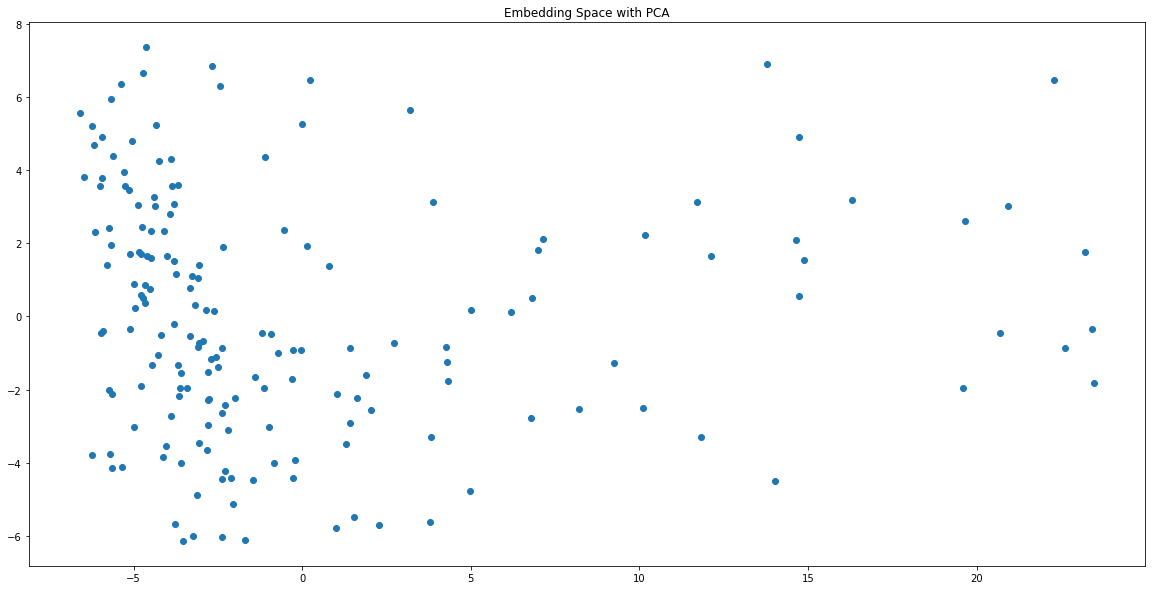

UMAP:(177, 3)


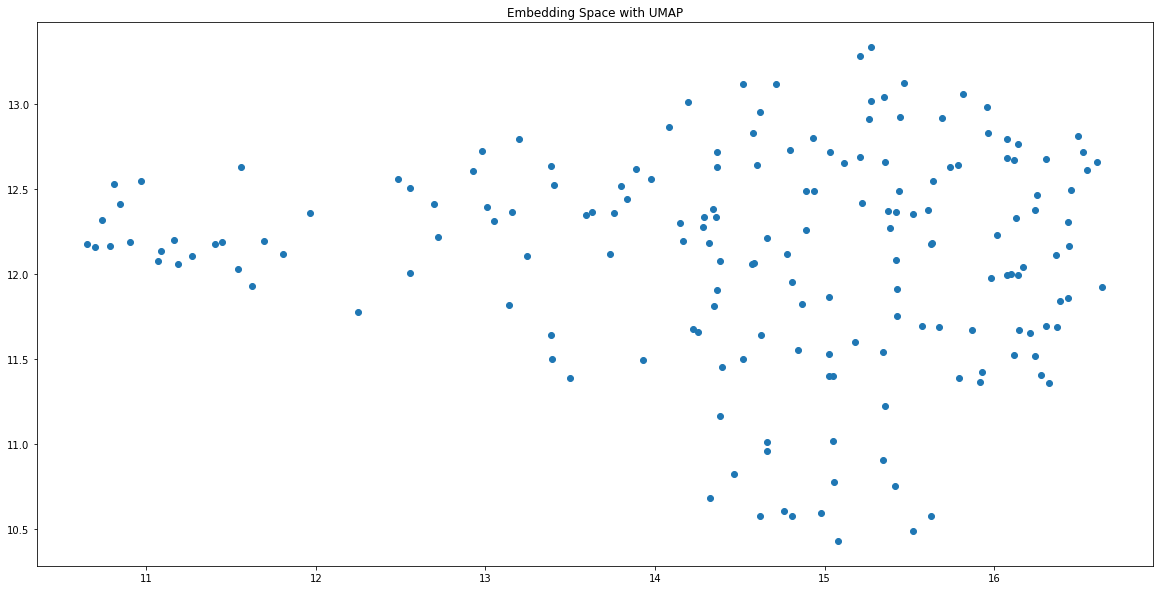

In [56]:
from sklearn.decomposition import PCA
from umap import UMAP

pca = PCA(n_components=100, random_state=42)
umap = UMAP(n_components=3, random_state=42)

# Extract Middle Layer Features
img_features = model.predict(tmp)
print(img_features.shape)

pca.fit(img_features)
# PCA
x = pca.fit_transform(img_features)
print(f"PCA:{x.shape}")
plt.scatter(x[:, 0], x[:, 1])
plt.title("Embedding Space with PCA")
plt.show()

#UMAP
x = umap.fit_transform(x)
print(f"UMAP:{x.shape}")
plt.scatter(x[:, 0], x[:, 1])
plt.title("Embedding Space with UMAP")
plt.show()

In [57]:
feature_dic = defaultdict()

for idx, pt_id in tqdm(enumerate(set(list(data.Patient)))):
  feature_dic[pt_id] = x[idx]
feature_dic

defaultdict(None,
            {'ID00007637202177411956430': array([14.519044, 13.120823,  8.679064], dtype=float32),
             'ID00009637202177434476278': array([14.366784, 12.62843 ,  8.419565], dtype=float32),
             'ID00010637202177584971671': array([13.008075, 12.396779,  8.003173], dtype=float32),
             'ID00011637202177653955184': array([12.721481 , 12.221588 ,  7.7609015], dtype=float32),
             'ID00012637202177665765362': array([15.637294 , 12.5499935,  9.391167 ], dtype=float32),
             'ID00014637202177757139317': array([16.38836 , 11.841897,  8.008693], dtype=float32),
             'ID00015637202177877247924': array([13.387521, 11.639538,  8.896622], dtype=float32),
             'ID00019637202178323708467': array([16.302984 , 12.6766405,  7.834379 ], dtype=float32),
             'ID00020637202178344345685': array([13.928098, 11.492467,  8.638688], dtype=float32),
             'ID00023637202179104603099': array([10.809794, 12.532415,  7.889692],

In [58]:
features = feature_dic[data.Patient[0]]
for pt_id in data.Patient[1:]:
  features = np.vstack([features, feature_dic[pt_id]])
features

array([[14.519044 , 13.120823 ,  8.679064 ],
       [14.519044 , 13.120823 ,  8.679064 ],
       [14.519044 , 13.120823 ,  8.679064 ],
       ...,
       [16.096395 , 12.000373 ,  7.6567297],
       [16.096395 , 12.000373 ,  7.6567297],
       [16.096395 , 12.000373 ,  7.6567297]], dtype=float32)

In [59]:
img_feature1 = features[:,0].tolist()
img_feature2 = features[:,1].tolist()
img_feature3 = features[:,2].tolist()

In [60]:
data["img_feature1"] = img_feature1
data["img_feature2"] = img_feature2
data["img_feature3"] = img_feature3
data

,Patient,predict_Week,FVC,Patient_Week,base_Week,base_FVC,base_Percent,base_Age,Sex,SmokingStatus,N_CT,fvc_min,fvc_max,fvc_min_ratio,fvc_max_ratio,diff_fvc_ratio,diff_fvc2,Age,typical_FVC_cluster,base_FVC_diff_fvc_div,diff_fvc_base_FVC_prd,log_N_CT,log_diff_fvc_base_FVC_prd,Week_passed_diff_fvc_max,base_FVC_Week_passed_max,Week_passed_diff_fvc_min,base_FVC_diff_fvc_min,base_FVC_Week_passed_min,Week_passed_diff_fvc_median,base_FVC_diff_fvc_median,base_FVC_Week_passed_median,Week_passed_diff_fvc_mad,base_FVC_diff_fvc_mad,base_FVC_Week_passed_mad,Week_passed_diff_fvc_var,base_FVC_diff_fvc_var,base_FVC_Week_passed_var,Week_passed_diff_fvc_std,base_FVC_diff_fvc_std,base_FVC_Week_passed_std,img_feature1,img_feature2,img_feature3
0,ID00007637202177411956430,5,2214.000000,ID00007637202177411956430_5,-4,2315.00000,58.253649,79,1,1,30,214.000000,101.000000,0.092441,0.043629,0.043629,0.531115,79.0960,28,23.0,233815.000000,3.433987,12.362290,101.000000,2315.00000,9.0,101.000000,9.0,55.000000,1208.000000,1162.00000,46.000000,1107.000000,1153.00000,4232.000000,2.450898e+06,2.658818e+06,65.053824,1565.534414,1630.588237,14.519044,13.120823,8.679064
1,ID00007637202177411956430,7,2061.000000,ID00007637202177411956430_7,-4,2315.00000,58.253649,79,1,1,30,61.000000,254.000000,0.026350,0.109719,0.109719,0.578250,79.1344,25,9.0,588010.000000,3.433987,13.284501,254.000000,2315.00000,11.0,254.000000,11.0,132.500000,1284.500000,1163.00000,121.500000,1030.500000,1152.00000,29524.500000,2.123860e+06,2.654208e+06,171.826948,1457.347076,1629.174024,14.519044,13.120823,8.679064
2,ID00007637202177411956430,9,2144.000000,ID00007637202177411956430_9,-4,2315.00000,58.253649,79,1,1,30,144.000000,171.000000,0.062203,0.073866,0.073866,0.552680,79.1728,27,14.0,395865.000000,3.433987,12.888831,171.000000,2315.00000,13.0,171.000000,13.0,92.000000,1243.000000,1164.00000,79.000000,1072.000000,1151.00000,12482.000000,2.298368e+06,2.649602e+06,111.722871,1516.036939,1627.759810,14.519044,13.120823,8.679064
3,ID00007637202177411956430,11,2069.000000,ID00007637202177411956430_11,-4,2315.00000,58.253649,79,1,1,30,69.000000,246.000000,0.029806,0.106263,0.106263,0.575786,79.2112,26,9.0,569490.000000,3.433987,13.252498,246.000000,2315.00000,15.0,246.000000,15.0,130.500000,1280.500000,1165.00000,115.500000,1034.500000,1150.00000,26680.500000,2.140380e+06,2.645000e+06,163.341666,1463.003930,1626.345597,14.519044,13.120823,8.679064
4,ID00007637202177411956430,17,2101.000000,ID00007637202177411956430_17,-4,2315.00000,58.253649,79,1,1,30,101.000000,214.000000,0.043629,0.092441,0.092441,0.565927,79.3264,26,11.0,495410.000000,3.433987,13.113143,214.000000,2315.00000,21.0,214.000000,21.0,117.500000,1264.500000,1168.00000,96.500000,1050.500000,1147.00000,18624.500000,2.207100e+06,2.631218e+06,136.471609,1485.631347,1622.102956,14.519044,13.120823,8.679064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12869,ID00426637202313170790466,129,2711.466358,ID00426637202313170790466_129,0,2955.99348,66.588074,73,1,0,408,4.102817,266.533642,0.001388,0.090167,0.082722,0.575332,75.4768,31,12.0,722820.576975,6.013715,13.490918,244.527122,2955.99348,99.0,244.527122,99.0,171.763561,1600.260301,1527.49674,72.763561,1355.733179,1428.49674,10589.071558,3.676025e+06,4.081206e+06,102.903215,1917.296249,2020.199463,16.096395,12.000373,7.656730
12870,ID00426637202313170790466,130,2717.701364,ID00426637202313170790466_130,0,2955.99348,66.741193,73,1,0,408,10.337823,260.298636,0.003497,0.088058,0.080613,0.573411,75.4960,31,12.0,704389.939570,6.013715,13.465089,238.292115,2955.99348,99.0,238.292115,99.0,168.646058,1597.142798,1527.49674,69.646058,1358.850682,1428.49674,9701.146716,3.692950e+06,4.081206e+06,98.494399,1921.705064,2020.199463,16.096395,12.000373,7.656730
12871,ID00426637202313170790466,131,2711.180664,ID00426637202313170790466_131,0,2955.99348,66.581058,73,1,0,408,3.81

In [61]:
tmp1 = CreateFeat(data[["base_FVC_diff_fvc_div", "img_feature1"]])
data = pd.concat([data, tmp1], axis=1)
#remove dup colunes
data = data.loc[:,~data.columns.duplicated()]
tmp１ = ReduceCol(data.iloc[:,10:])
data = pd.concat([data.iloc[:,:10], tmp１], axis=1)
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Crated 4 columns



Removed 1 constant & duplicated columns


,Patient,predict_Week,FVC,Patient_Week,base_Week,base_FVC,base_Percent,base_Age,Sex,SmokingStatus,N_CT,fvc_min,fvc_max,fvc_min_ratio,fvc_max_ratio,diff_fvc_ratio,diff_fvc2,Age,typical_FVC_cluster,base_FVC_diff_fvc_div,diff_fvc_base_FVC_prd,log_N_CT,log_diff_fvc_base_FVC_prd,Week_passed_diff_fvc_max,base_FVC_Week_passed_max,Week_passed_diff_fvc_min,base_FVC_diff_fvc_min,base_FVC_Week_passed_min,Week_passed_diff_fvc_median,base_FVC_diff_fvc_median,base_FVC_Week_passed_median,Week_passed_diff_fvc_mad,base_FVC_diff_fvc_mad,base_FVC_Week_passed_mad,Week_passed_diff_fvc_var,base_FVC_diff_fvc_var,base_FVC_Week_passed_var,Week_passed_diff_fvc_std,base_FVC_diff_fvc_std,base_FVC_Week_passed_std,img_feature1,img_feature2,img_feature3,base_FVC_diff_fvc_div_img_feature1_div,img_feature1_base_FVC_diff_fvc_div_prd,img_feature1_base_FVC_diff_fvc_div_div
0,ID00007637202177411956430,5,2214.000000,ID00007637202177411956430_5,-4,2315.00000,58.253649,79,1,1,30,214.000000,101.000000,0.092441,0.043629,0.043629,0.531115,79.0960,28,23.0,233815.000000,3.433987,12.362290,101.000000,2315.00000,9.0,101.000000,9.0,55.000000,1208.000000,1162.00000,46.000000,1107.000000,1153.00000,4232.000000,2.450898e+06,2.658818e+06,65.053824,1565.534414,1630.588237,14.519044,13.120823,8.679064,2.0,333.938010,1.0
1,ID00007637202177411956430,7,2061.000000,ID00007637202177411956430_7,-4,2315.00000,58.253649,79,1,1,30,61.000000,254.000000,0.026350,0.109719,0.109719,0.578250,79.1344,25,9.0,588010.000000,3.433987,13.284501,254.000000,2315.00000,11.0,254.000000,11.0,132.500000,1284.500000,1163.00000,121.500000,1030.500000,1152.00000,29524.500000,2.123860e+06,2.654208e+06,171.826948,1457.347076,1629.174024,14.519044,13.120823,8.679064,1.0,130.671395,2.0
2,ID00007637202177411956430,9,2144.000000,ID00007637202177411956430_9,-4,2315.00000,58.253649,79,1,1,30,144.000000,171.000000,0.062203,0.073866,0.073866,0.552680,79.1728,27,14.0,395865.000000,3.433987,12.888831,171.000000,2315.00000,13.0,171.000000,13.0,92.000000,1243.000000,1164.00000,79.000000,1072.000000,1151.00000,12482.000000,2.298368e+06,2.649602e+06,111.722871,1516.036939,1627.759810,14.519044,13.120823,8.679064,1.0,203.266615,1.0
3,ID00007637202177411956430,11,2069.000000,ID00007637202177411956430_11,-4,2315.00000,58.253649,79,1,1,30,69.000000,246.000000,0.029806,0.106263,0.106263,0.575786,79.2112,26,9.0,569490.000000,3.433987,13.252498,246.000000,2315.00000,15.0,246.000000,15.0,130.500000,1280.500000,1165.00000,115.500000,1034.500000,1150.00000,26680.500000,2.140380e+06,2.645000e+06,163.341666,1463.003930,1626.345597,14.519044,13.120823,8.679064,1.0,130.671395,2.0
4,ID00007637202177411956430,17,2101.000000,ID00007637202177411956430_17,-4,2315.00000,58.253649,79,1,1,30,101.000000,214.000000,0.043629,0.092441,0.092441,0.565927,79.3264,26,11.0,495410.000000,3.433987,13.113143,214.000000,2315.00000,21.0,214.000000,21.0,117.500000,1264.500000,1168.00000,96.500000,1050.500000,1147.00000,18624.500000,2.207100e+06,2.631218e+06,136.471609,1485.631347,1622.102956,14.519044,13.120823,8.679064,1.0,159.709483,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12869,ID00426637202313170790466,129,2711.466358,ID00426637202313170790466_129,0,2955.99348,66.588074,73,1,0,408,4.102817,266.533642,0.001388,0.090167,0.082722,0.575332,75.4768,31,12.0,722820.576975,6.013715,13.490918,244.527122,2955.99348,99.0,244.527122,99.0,171.763561,1600.260301,1527.49674,72.763561,1355.733179,1428.49674,10589.071558,3.676025e+06,4.081206e+06,102.903215,1917.296249,2020.199463,16.096395,12.000373,7.656730,1.0,193.156746,1.0
12870,ID00426637202313170790466,130,2717.701364,ID00426637202313170790466_130,0,2955.99348,66.741193,73,1,0,408,10.337823,260.298636,0.003497,0.088058,0.080613,0.573411,75.4960,31,12.0,704389.939570,6.013715,13.465089,238.292115,2955.99348,99.0,238.292115,99.0,168.646058,1597.142798,1527.49674,69.6460

In [62]:
tmp1 = CreateFeat(data[["base_FVC_diff_fvc_div", "img_feature2"]])
data = pd.concat([data, tmp1], axis=1)
#remove dup colunes
data = data.loc[:,~data.columns.duplicated()]
tmp１ = ReduceCol(data.iloc[:,10:])
data = pd.concat([data.iloc[:,:10], tmp１], axis=1)
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Crated 4 columns



Removed 1 constant & duplicated columns


,Patient,predict_Week,FVC,Patient_Week,base_Week,base_FVC,base_Percent,base_Age,Sex,SmokingStatus,N_CT,fvc_min,fvc_max,fvc_min_ratio,fvc_max_ratio,diff_fvc_ratio,diff_fvc2,Age,typical_FVC_cluster,base_FVC_diff_fvc_div,diff_fvc_base_FVC_prd,log_N_CT,log_diff_fvc_base_FVC_prd,Week_passed_diff_fvc_max,base_FVC_Week_passed_max,Week_passed_diff_fvc_min,base_FVC_diff_fvc_min,base_FVC_Week_passed_min,Week_passed_diff_fvc_median,base_FVC_diff_fvc_median,base_FVC_Week_passed_median,Week_passed_diff_fvc_mad,base_FVC_diff_fvc_mad,base_FVC_Week_passed_mad,Week_passed_diff_fvc_var,base_FVC_diff_fvc_var,base_FVC_Week_passed_var,Week_passed_diff_fvc_std,base_FVC_diff_fvc_std,base_FVC_Week_passed_std,img_feature1,img_feature2,img_feature3,base_FVC_diff_fvc_div_img_feature1_div,img_feature1_base_FVC_diff_fvc_div_prd,img_feature1_base_FVC_diff_fvc_div_div,base_FVC_diff_fvc_div_img_feature2_div,img_feature2_base_FVC_diff_fvc_div_prd,img_feature2_base_FVC_diff_fvc_div_div
0,ID00007637202177411956430,5,2214.000000,ID00007637202177411956430_5,-4,2315.00000,58.253649,79,1,1,30,214.000000,101.000000,0.092441,0.043629,0.043629,0.531115,79.0960,28,23.0,233815.000000,3.433987,12.362290,101.000000,2315.00000,9.0,101.000000,9.0,55.000000,1208.000000,1162.00000,46.000000,1107.000000,1153.00000,4232.000000,2.450898e+06,2.658818e+06,65.053824,1565.534414,1630.588237,14.519044,13.120823,8.679064,2.0,333.938010,1.0,2.0,301.778927,1.0
1,ID00007637202177411956430,7,2061.000000,ID00007637202177411956430_7,-4,2315.00000,58.253649,79,1,1,30,61.000000,254.000000,0.026350,0.109719,0.109719,0.578250,79.1344,25,9.0,588010.000000,3.433987,13.284501,254.000000,2315.00000,11.0,254.000000,11.0,132.500000,1284.500000,1163.00000,121.500000,1030.500000,1152.00000,29524.500000,2.123860e+06,2.654208e+06,171.826948,1457.347076,1629.174024,14.519044,13.120823,8.679064,1.0,130.671395,2.0,1.0,118.087406,1.0
2,ID00007637202177411956430,9,2144.000000,ID00007637202177411956430_9,-4,2315.00000,58.253649,79,1,1,30,144.000000,171.000000,0.062203,0.073866,0.073866,0.552680,79.1728,27,14.0,395865.000000,3.433987,12.888831,171.000000,2315.00000,13.0,171.000000,13.0,92.000000,1243.000000,1164.00000,79.000000,1072.000000,1151.00000,12482.000000,2.298368e+06,2.649602e+06,111.722871,1516.036939,1627.759810,14.519044,13.120823,8.679064,1.0,203.266615,1.0,1.0,183.691521,1.0
3,ID00007637202177411956430,11,2069.000000,ID00007637202177411956430_11,-4,2315.00000,58.253649,79,1,1,30,69.000000,246.000000,0.029806,0.106263,0.106263,0.575786,79.2112,26,9.0,569490.000000,3.433987,13.252498,246.000000,2315.00000,15.0,246.000000,15.0,130.500000,1280.500000,1165.00000,115.500000,1034.500000,1150.00000,26680.500000,2.140380e+06,2.645000e+06,163.341666,1463.003930,1626.345597,14.519044,13.120823,8.679064,1.0,130.671395,2.0,1.0,118.087406,1.0
4,ID00007637202177411956430,17,2101.000000,ID00007637202177411956430_17,-4,2315.00000,58.253649,79,1,1,30,101.000000,214.000000,0.043629,0.092441,0.092441,0.565927,79.3264,26,11.0,495410.000000,3.433987,13.113143,214.000000,2315.00000,21.0,214.000000,21.0,117.500000,1264.500000,1168.00000,96.500000,1050.500000,1147.00000,18624.500000,2.207100e+06,2.631218e+06,136.471609,1485.631347,1622.102956,14.519044,13.120823,8.679064,1.0,159.709483,1.0,1.0,144.329052,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12869,ID00426637202313170790466,129,2711.466358,ID00426637202313170790466_129,0,2955.99348,66.588074,73,1,0,408,4.102817,266.533642,0.001388,0.090167,0.082722,0.575332,75.4768,31,12.0,722820.576975,6.013715,13.490918,244.527122,2955.99348,99.0,244.527122,99.0,171.763561,1600.260301,1527.49674,72.763561,1355.733179,1428.49674,10589.071558,3.676025e+06,4.081206e+06,102.903215,1917.296249,2020.199463,16.096395,12.000373,7.656730,1.0,193.156746,1.0,1.0,144.004475,1.0
12870,ID00426637202313170790466,130,2717.701364,ID004266372

In [63]:
tmp1 = CreateFeat(data[["base_FVC_diff_fvc_div", "img_feature3"]])
data = pd.concat([data, tmp1], axis=1)
#remove dup colunes
data = data.loc[:,~data.columns.duplicated()]
tmp１ = ReduceCol(data.iloc[:,10:])
data = pd.concat([data.iloc[:,:10], tmp１], axis=1)
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Crated 4 columns



Removed 1 constant & duplicated columns


,Patient,predict_Week,FVC,Patient_Week,base_Week,base_FVC,base_Percent,base_Age,Sex,SmokingStatus,N_CT,fvc_min,fvc_max,fvc_min_ratio,fvc_max_ratio,diff_fvc_ratio,diff_fvc2,Age,typical_FVC_cluster,base_FVC_diff_fvc_div,diff_fvc_base_FVC_prd,log_N_CT,log_diff_fvc_base_FVC_prd,Week_passed_diff_fvc_max,base_FVC_Week_passed_max,Week_passed_diff_fvc_min,base_FVC_diff_fvc_min,base_FVC_Week_passed_min,Week_passed_diff_fvc_median,base_FVC_diff_fvc_median,base_FVC_Week_passed_median,Week_passed_diff_fvc_mad,base_FVC_diff_fvc_mad,base_FVC_Week_passed_mad,Week_passed_diff_fvc_var,base_FVC_diff_fvc_var,base_FVC_Week_passed_var,Week_passed_diff_fvc_std,base_FVC_diff_fvc_std,base_FVC_Week_passed_std,img_feature1,img_feature2,img_feature3,base_FVC_diff_fvc_div_img_feature1_div,img_feature1_base_FVC_diff_fvc_div_prd,img_feature1_base_FVC_diff_fvc_div_div,base_FVC_diff_fvc_div_img_feature2_div,img_feature2_base_FVC_diff_fvc_div_prd,img_feature2_base_FVC_diff_fvc_div_div,base_FVC_diff_fvc_div_img_feature3_div,img_feature3_base_FVC_diff_fvc_div_prd,img_feature3_base_FVC_diff_fvc_div_div
0,ID00007637202177411956430,5,2214.000000,ID00007637202177411956430_5,-4,2315.00000,58.253649,79,1,1,30,214.000000,101.000000,0.092441,0.043629,0.043629,0.531115,79.0960,28,23.0,233815.000000,3.433987,12.362290,101.000000,2315.00000,9.0,101.000000,9.0,55.000000,1208.000000,1162.00000,46.000000,1107.000000,1153.00000,4232.000000,2.450898e+06,2.658818e+06,65.053824,1565.534414,1630.588237,14.519044,13.120823,8.679064,2.0,333.938010,1.0,2.0,301.778927,1.0,3.0,199.618467,0.0
1,ID00007637202177411956430,7,2061.000000,ID00007637202177411956430_7,-4,2315.00000,58.253649,79,1,1,30,61.000000,254.000000,0.026350,0.109719,0.109719,0.578250,79.1344,25,9.0,588010.000000,3.433987,13.284501,254.000000,2315.00000,11.0,254.000000,11.0,132.500000,1284.500000,1163.00000,121.500000,1030.500000,1152.00000,29524.500000,2.123860e+06,2.654208e+06,171.826948,1457.347076,1629.174024,14.519044,13.120823,8.679064,1.0,130.671395,2.0,1.0,118.087406,1.0,1.0,78.111574,1.0
2,ID00007637202177411956430,9,2144.000000,ID00007637202177411956430_9,-4,2315.00000,58.253649,79,1,1,30,144.000000,171.000000,0.062203,0.073866,0.073866,0.552680,79.1728,27,14.0,395865.000000,3.433987,12.888831,171.000000,2315.00000,13.0,171.000000,13.0,92.000000,1243.000000,1164.00000,79.000000,1072.000000,1151.00000,12482.000000,2.298368e+06,2.649602e+06,111.722871,1516.036939,1627.759810,14.519044,13.120823,8.679064,1.0,203.266615,1.0,1.0,183.691521,1.0,2.0,121.506893,1.0
3,ID00007637202177411956430,11,2069.000000,ID00007637202177411956430_11,-4,2315.00000,58.253649,79,1,1,30,69.000000,246.000000,0.029806,0.106263,0.106263,0.575786,79.2112,26,9.0,569490.000000,3.433987,13.252498,246.000000,2315.00000,15.0,246.000000,15.0,130.500000,1280.500000,1165.00000,115.500000,1034.500000,1150.00000,26680.500000,2.140380e+06,2.645000e+06,163.341666,1463.003930,1626.345597,14.519044,13.120823,8.679064,1.0,130.671395,2.0,1.0,118.087406,1.0,1.0,78.111574,1.0
4,ID00007637202177411956430,17,2101.000000,ID00007637202177411956430_17,-4,2315.00000,58.253649,79,1,1,30,101.000000,214.000000,0.043629,0.092441,0.092441,0.565927,79.3264,26,11.0,495410.000000,3.433987,13.113143,214.000000,2315.00000,21.0,214.000000,21.0,117.500000,1264.500000,1168.00000,96.500000,1050.500000,1147.00000,18624.500000,2.207100e+06,2.631218e+06,136.471609,1485.631347,1622.102956,14.519044,13.120823,8.679064,1.0,159.709483,1.0,1.0,144.329052,1.0,1.0,95.469702,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12869,ID00426637202313170790466,129,2711.466358,ID00426637202313170790466_129,0,2955.99348,66.588074,73,1,0,408,4.102817,266.533642,0.001388,0.090167,0.082722,0.575332,75.4768,31,12.0,722820.576975,6.013715,13.490918,244.527122,2955.99348,99.0,244.527122,99.0,171.763561,1600.260301,1527.49674,72.763561,13

In [64]:
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(how='any', axis=1)
data

,Patient,predict_Week,FVC,Patient_Week,base_Week,base_FVC,base_Percent,base_Age,Sex,SmokingStatus,N_CT,fvc_min,fvc_max,fvc_min_ratio,fvc_max_ratio,diff_fvc_ratio,diff_fvc2,Age,typical_FVC_cluster,base_FVC_diff_fvc_div,diff_fvc_base_FVC_prd,log_N_CT,Week_passed_diff_fvc_max,base_FVC_Week_passed_max,Week_passed_diff_fvc_min,base_FVC_diff_fvc_min,base_FVC_Week_passed_min,Week_passed_diff_fvc_median,base_FVC_diff_fvc_median,base_FVC_Week_passed_median,Week_passed_diff_fvc_mad,base_FVC_diff_fvc_mad,base_FVC_Week_passed_mad,Week_passed_diff_fvc_var,base_FVC_diff_fvc_var,base_FVC_Week_passed_var,Week_passed_diff_fvc_std,base_FVC_diff_fvc_std,base_FVC_Week_passed_std,img_feature1,img_feature2,img_feature3,base_FVC_diff_fvc_div_img_feature1_div,img_feature1_base_FVC_diff_fvc_div_prd,img_feature1_base_FVC_diff_fvc_div_div,base_FVC_diff_fvc_div_img_feature2_div,img_feature2_base_FVC_diff_fvc_div_prd,img_feature2_base_FVC_diff_fvc_div_div,base_FVC_diff_fvc_div_img_feature3_div,img_feature3_base_FVC_diff_fvc_div_prd,img_feature3_base_FVC_diff_fvc_div_div
0,ID00007637202177411956430,5,2214.000000,ID00007637202177411956430_5,-4,2315.00000,58.253649,79,1,1,30,214.000000,101.000000,0.092441,0.043629,0.043629,0.531115,79.0960,28,23.0,233815.000000,3.433987,101.000000,2315.00000,9.0,101.000000,9.0,55.000000,1208.000000,1162.00000,46.000000,1107.000000,1153.00000,4232.000000,2.450898e+06,2.658818e+06,65.053824,1565.534414,1630.588237,14.519044,13.120823,8.679064,2.0,333.938010,1.0,2.0,301.778927,1.0,3.0,199.618467,0.0
1,ID00007637202177411956430,7,2061.000000,ID00007637202177411956430_7,-4,2315.00000,58.253649,79,1,1,30,61.000000,254.000000,0.026350,0.109719,0.109719,0.578250,79.1344,25,9.0,588010.000000,3.433987,254.000000,2315.00000,11.0,254.000000,11.0,132.500000,1284.500000,1163.00000,121.500000,1030.500000,1152.00000,29524.500000,2.123860e+06,2.654208e+06,171.826948,1457.347076,1629.174024,14.519044,13.120823,8.679064,1.0,130.671395,2.0,1.0,118.087406,1.0,1.0,78.111574,1.0
2,ID00007637202177411956430,9,2144.000000,ID00007637202177411956430_9,-4,2315.00000,58.253649,79,1,1,30,144.000000,171.000000,0.062203,0.073866,0.073866,0.552680,79.1728,27,14.0,395865.000000,3.433987,171.000000,2315.00000,13.0,171.000000,13.0,92.000000,1243.000000,1164.00000,79.000000,1072.000000,1151.00000,12482.000000,2.298368e+06,2.649602e+06,111.722871,1516.036939,1627.759810,14.519044,13.120823,8.679064,1.0,203.266615,1.0,1.0,183.691521,1.0,2.0,121.506893,1.0
3,ID00007637202177411956430,11,2069.000000,ID00007637202177411956430_11,-4,2315.00000,58.253649,79,1,1,30,69.000000,246.000000,0.029806,0.106263,0.106263,0.575786,79.2112,26,9.0,569490.000000,3.433987,246.000000,2315.00000,15.0,246.000000,15.0,130.500000,1280.500000,1165.00000,115.500000,1034.500000,1150.00000,26680.500000,2.140380e+06,2.645000e+06,163.341666,1463.003930,1626.345597,14.519044,13.120823,8.679064,1.0,130.671395,2.0,1.0,118.087406,1.0,1.0,78.111574,1.0
4,ID00007637202177411956430,17,2101.000000,ID00007637202177411956430_17,-4,2315.00000,58.253649,79,1,1,30,101.000000,214.000000,0.043629,0.092441,0.092441,0.565927,79.3264,26,11.0,495410.000000,3.433987,214.000000,2315.00000,21.0,214.000000,21.0,117.500000,1264.500000,1168.00000,96.500000,1050.500000,1147.00000,18624.500000,2.207100e+06,2.631218e+06,136.471609,1485.631347,1622.102956,14.519044,13.120823,8.679064,1.0,159.709483,1.0,1.0,144.329052,1.0,1.0,95.469702,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12869,ID00426637202313170790466,129,2711.466358,ID00426637202313170790466_129,0,2955.99348,66.588074,73,1,0,408,4.102817,266.533642,0.001388,0.090167,0.082722,0.575332,75.4768,31,12.0,722820.576975,6.013715,244.527122,2955.99348,99.0,244.527122,99.0,171.763561,1600.260301,1527.49674,72.763561,1355.733179,1428.49674,10589.071558,3.676025e+06,4.081206e+06,102.903215,1917.296249,2020.19

In [65]:
# clipping
clipping = data.columns[10:]
for col in clipping:
  upperbound, lowerbound = np.percentile(data[col], [1, 99])
  data[col] = np.clip(data[col], upperbound, lowerbound)

In [66]:
# clean up column names with a simple instruction
# https://stackoverflow.com/questions/60698860/how-to-deal-with-do-not-support-non-ascii-characters-in-feature-name-error-whe
import re
data = data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
data

,Patient,predict_Week,FVC,Patient_Week,base_Week,base_FVC,base_Percent,base_Age,Sex,SmokingStatus,N_CT,fvc_min,fvc_max,fvc_min_ratio,fvc_max_ratio,diff_fvc_ratio,diff_fvc2,Age,typical_FVC_cluster,base_FVC_diff_fvc_div,diff_fvc_base_FVC_prd,log_N_CT,Week_passed_diff_fvc_max,base_FVC_Week_passed_max,Week_passed_diff_fvc_min,base_FVC_diff_fvc_min,base_FVC_Week_passed_min,Week_passed_diff_fvc_median,base_FVC_diff_fvc_median,base_FVC_Week_passed_median,Week_passed_diff_fvc_mad,base_FVC_diff_fvc_mad,base_FVC_Week_passed_mad,Week_passed_diff_fvc_var,base_FVC_diff_fvc_var,base_FVC_Week_passed_var,Week_passed_diff_fvc_std,base_FVC_diff_fvc_std,base_FVC_Week_passed_std,img_feature1,img_feature2,img_feature3,base_FVC_diff_fvc_div_img_feature1_div,img_feature1_base_FVC_diff_fvc_div_prd,img_feature1_base_FVC_diff_fvc_div_div,base_FVC_diff_fvc_div_img_feature2_div,img_feature2_base_FVC_diff_fvc_div_prd,img_feature2_base_FVC_diff_fvc_div_div,base_FVC_diff_fvc_div_img_feature3_div,img_feature3_base_FVC_diff_fvc_div_prd,img_feature3_base_FVC_diff_fvc_div_div
0,ID00007637202177411956430,5,2214.000000,ID00007637202177411956430_5,-4,2315.00000,58.253649,79,1,1,30,214.000000,101.000000,0.092441,0.043629,0.043629,0.531115,79.0960,28,23.0,233815.000000,3.433987,101.000000,2315.00000,9.0,101.000000,9.0,55.000000,1208.000000,1162.00000,46.000000,1107.000000,1153.00000,4232.000000,2.450898e+06,2.658818e+06,65.053824,1565.534414,1630.588237,14.519044,13.120823,8.679064,2.0,333.938010,1.0,2.0,301.778927,1.0,3.0,199.618467,0.0
1,ID00007637202177411956430,7,2061.000000,ID00007637202177411956430_7,-4,2315.00000,58.253649,79,1,1,30,61.000000,254.000000,0.026350,0.109719,0.109719,0.578250,79.1344,25,9.0,588010.000000,3.433987,254.000000,2315.00000,11.0,254.000000,11.0,132.500000,1284.500000,1163.00000,121.500000,1030.500000,1152.00000,29524.500000,2.123860e+06,2.654208e+06,171.826948,1457.347076,1629.174024,14.519044,13.120823,8.679064,1.0,130.671395,2.0,1.0,118.087406,1.0,1.0,78.111574,1.0
2,ID00007637202177411956430,9,2144.000000,ID00007637202177411956430_9,-4,2315.00000,58.253649,79,1,1,30,144.000000,171.000000,0.062203,0.073866,0.073866,0.552680,79.1728,27,14.0,395865.000000,3.433987,171.000000,2315.00000,13.0,171.000000,13.0,92.000000,1243.000000,1164.00000,79.000000,1072.000000,1151.00000,12482.000000,2.298368e+06,2.649602e+06,111.722871,1516.036939,1627.759810,14.519044,13.120823,8.679064,1.0,203.266615,1.0,1.0,183.691521,1.0,2.0,121.506893,1.0
3,ID00007637202177411956430,11,2069.000000,ID00007637202177411956430_11,-4,2315.00000,58.253649,79,1,1,30,69.000000,246.000000,0.029806,0.106263,0.106263,0.575786,79.2112,26,9.0,569490.000000,3.433987,246.000000,2315.00000,15.0,246.000000,15.0,130.500000,1280.500000,1165.00000,115.500000,1034.500000,1150.00000,26680.500000,2.140380e+06,2.645000e+06,163.341666,1463.003930,1626.345597,14.519044,13.120823,8.679064,1.0,130.671395,2.0,1.0,118.087406,1.0,1.0,78.111574,1.0
4,ID00007637202177411956430,17,2101.000000,ID00007637202177411956430_17,-4,2315.00000,58.253649,79,1,1,30,101.000000,214.000000,0.043629,0.092441,0.092441,0.565927,79.3264,26,11.0,495410.000000,3.433987,214.000000,2315.00000,21.0,214.000000,21.0,117.500000,1264.500000,1168.00000,96.500000,1050.500000,1147.00000,18624.500000,2.207100e+06,2.631218e+06,136.471609,1485.631347,1622.102956,14.519044,13.120823,8.679064,1.0,159.709483,1.0,1.0,144.329052,1.0,1.0,95.469702,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12869,ID00426637202313170790466,129,2711.466358,ID00426637202313170790466_129,0,2955.99348,66.588074,73,1,0,408,4.102817,266.533642,0.001388,0.090167,0.082722,0.575332,75.4768,31,12.0,722820.576975,6.013715,244.527122,2955.99348,99.0,244.527122,99.0,171.763561,1600.260301,1527.49674,72.763561,1355.733179,1428.49674,10589.071558,3.676025e+06,4.081206e+06,102.903215,1917.296249,2020.19

In [67]:
data['WHERE'] = Splitdata
data

,Patient,predict_Week,FVC,Patient_Week,base_Week,base_FVC,base_Percent,base_Age,Sex,SmokingStatus,N_CT,fvc_min,fvc_max,fvc_min_ratio,fvc_max_ratio,diff_fvc_ratio,diff_fvc2,Age,typical_FVC_cluster,base_FVC_diff_fvc_div,diff_fvc_base_FVC_prd,log_N_CT,Week_passed_diff_fvc_max,base_FVC_Week_passed_max,Week_passed_diff_fvc_min,base_FVC_diff_fvc_min,base_FVC_Week_passed_min,Week_passed_diff_fvc_median,base_FVC_diff_fvc_median,base_FVC_Week_passed_median,Week_passed_diff_fvc_mad,base_FVC_diff_fvc_mad,base_FVC_Week_passed_mad,Week_passed_diff_fvc_var,base_FVC_diff_fvc_var,base_FVC_Week_passed_var,Week_passed_diff_fvc_std,base_FVC_diff_fvc_std,base_FVC_Week_passed_std,img_feature1,img_feature2,img_feature3,base_FVC_diff_fvc_div_img_feature1_div,img_feature1_base_FVC_diff_fvc_div_prd,img_feature1_base_FVC_diff_fvc_div_div,base_FVC_diff_fvc_div_img_feature2_div,img_feature2_base_FVC_diff_fvc_div_prd,img_feature2_base_FVC_diff_fvc_div_div,base_FVC_diff_fvc_div_img_feature3_div,img_feature3_base_FVC_diff_fvc_div_prd,img_feature3_base_FVC_diff_fvc_div_div,WHERE
0,ID00007637202177411956430,5,2214.000000,ID00007637202177411956430_5,-4,2315.00000,58.253649,79,1,1,30,214.000000,101.000000,0.092441,0.043629,0.043629,0.531115,79.0960,28,23.0,233815.000000,3.433987,101.000000,2315.00000,9.0,101.000000,9.0,55.000000,1208.000000,1162.00000,46.000000,1107.000000,1153.00000,4232.000000,2.450898e+06,2.658818e+06,65.053824,1565.534414,1630.588237,14.519044,13.120823,8.679064,2.0,333.938010,1.0,2.0,301.778927,1.0,3.0,199.618467,0.0,train
1,ID00007637202177411956430,7,2061.000000,ID00007637202177411956430_7,-4,2315.00000,58.253649,79,1,1,30,61.000000,254.000000,0.026350,0.109719,0.109719,0.578250,79.1344,25,9.0,588010.000000,3.433987,254.000000,2315.00000,11.0,254.000000,11.0,132.500000,1284.500000,1163.00000,121.500000,1030.500000,1152.00000,29524.500000,2.123860e+06,2.654208e+06,171.826948,1457.347076,1629.174024,14.519044,13.120823,8.679064,1.0,130.671395,2.0,1.0,118.087406,1.0,1.0,78.111574,1.0,train
2,ID00007637202177411956430,9,2144.000000,ID00007637202177411956430_9,-4,2315.00000,58.253649,79,1,1,30,144.000000,171.000000,0.062203,0.073866,0.073866,0.552680,79.1728,27,14.0,395865.000000,3.433987,171.000000,2315.00000,13.0,171.000000,13.0,92.000000,1243.000000,1164.00000,79.000000,1072.000000,1151.00000,12482.000000,2.298368e+06,2.649602e+06,111.722871,1516.036939,1627.759810,14.519044,13.120823,8.679064,1.0,203.266615,1.0,1.0,183.691521,1.0,2.0,121.506893,1.0,train
3,ID00007637202177411956430,11,2069.000000,ID00007637202177411956430_11,-4,2315.00000,58.253649,79,1,1,30,69.000000,246.000000,0.029806,0.106263,0.106263,0.575786,79.2112,26,9.0,569490.000000,3.433987,246.000000,2315.00000,15.0,246.000000,15.0,130.500000,1280.500000,1165.00000,115.500000,1034.500000,1150.00000,26680.500000,2.140380e+06,2.645000e+06,163.341666,1463.003930,1626.345597,14.519044,13.120823,8.679064,1.0,130.671395,2.0,1.0,118.087406,1.0,1.0,78.111574,1.0,train
4,ID00007637202177411956430,17,2101.000000,ID00007637202177411956430_17,-4,2315.00000,58.253649,79,1,1,30,101.000000,214.000000,0.043629,0.092441,0.092441,0.565927,79.3264,26,11.0,495410.000000,3.433987,214.000000,2315.00000,21.0,214.000000,21.0,117.500000,1264.500000,1168.00000,96.500000,1050.500000,1147.00000,18624.500000,2.207100e+06,2.631218e+06,136.471609,1485.631347,1622.102956,14.519044,13.120823,8.679064,1.0,159.709483,1.0,1.0,144.329052,1.0,1.0,95.469702,1.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12869,ID00426637202313170790466,129,2711.466358,ID00426637202313170790466_129,0,2955.99348,66.588074,73,1,0,408,4.102817,266.533642,0.001388,0.090167,0.082722,0.575332,75.4768,31,12.0,722820.576975,6.013715,244.527122,2955.99348,99.0,244.527122,99.0,171.763561,1600.260301,1527.49674,72.763561,1355.733179,1428.49674,10589.071558,3.676025e+06,4.0

In [68]:
train = data[data['WHERE']=="train"]
test = data[data['WHERE']=="test"]

# Prepare folds

In [69]:
gk = GroupKFold(4)
train['fold'] = -1
for i, (train_idx, valid_idx) in enumerate(gk.split(train, groups=train["Patient"]), 1):
    train.loc[valid_idx, 'fold'] = int(i)
    
train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Patient,predict_Week,FVC,Patient_Week,base_Week,base_FVC,base_Percent,base_Age,Sex,SmokingStatus,N_CT,fvc_min,fvc_max,fvc_min_ratio,fvc_max_ratio,diff_fvc_ratio,diff_fvc2,Age,typical_FVC_cluster,base_FVC_diff_fvc_div,diff_fvc_base_FVC_prd,log_N_CT,Week_passed_diff_fvc_max,base_FVC_Week_passed_max,Week_passed_diff_fvc_min,base_FVC_diff_fvc_min,base_FVC_Week_passed_min,Week_passed_diff_fvc_median,base_FVC_diff_fvc_median,base_FVC_Week_passed_median,Week_passed_diff_fvc_mad,base_FVC_diff_fvc_mad,base_FVC_Week_passed_mad,Week_passed_diff_fvc_var,base_FVC_diff_fvc_var,base_FVC_Week_passed_var,Week_passed_diff_fvc_std,base_FVC_diff_fvc_std,base_FVC_Week_passed_std,img_feature1,img_feature2,img_feature3,base_FVC_diff_fvc_div_img_feature1_div,img_feature1_base_FVC_diff_fvc_div_prd,img_feature1_base_FVC_diff_fvc_div_div,base_FVC_diff_fvc_div_img_feature2_div,img_feature2_base_FVC_diff_fvc_div_prd,img_feature2_base_FVC_diff_fvc_div_div,base_FVC_diff_fvc_div_img_feature3_div,img_feature3_base_FVC_diff_fvc_div_prd,img_feature3_base_FVC_diff_fvc_div_div,WHERE,fold
0,ID00007637202177411956430,5,2214.0,ID00007637202177411956430_5,-4,2315.0,58.253649,79,1,1,30,214.000000,101.0,0.092441,0.043629,0.043629,0.531115,79.0960,28,23.0,233815.0,3.433987,101.0,2315.0,9.0,101.0,9.0,55.0,1208.0,1162.0,46.0,1107.0,1153.0,4232.0,2450898.0,2658818.0,65.053824,1565.534414,1630.588237,14.519044,13.120823,8.679064,2.0,333.938010,1.0,2.0,301.778927,1.0,3.0,199.618467,0.0,train,3
1,ID00007637202177411956430,7,2061.0,ID00007637202177411956430_7,-4,2315.0,58.253649,79,1,1,30,61.000000,254.0,0.026350,0.109719,0.109719,0.578250,79.1344,25,9.0,588010.0,3.433987,254.0,2315.0,11.0,254.0,11.0,132.5,1284.5,1163.0,121.5,1030.5,1152.0,29524.5,2123860.5,2654208.0,171.826948,1457.347076,1629.174024,14.519044,13.120823,8.679064,1.0,130.671395,2.0,1.0,118.087406,1.0,1.0,78.111574,1.0,train,3
2,ID00007637202177411956430,9,2144.0,ID00007637202177411956430_9,-4,2315.0,58.253649,79,1,1,30,144.000000,171.0,0.062203,0.073866,0.073866,0.552680,79.1728,27,14.0,395865.0,3.433987,171.0,2315.0,13.0,171.0,13.0,92.0,1243.0,1164.0,79.0,1072.0,1151.0,12482.0,2298368.0,2649602.0,111.722871,1516.036939,1627.759810,14.519044,13.120823,8.679064,1.0,203.266615,1.0,1.0,183.691521,1.0,2.0,121.506893,1.0,train,3
3,ID00007637202177411956430,11,2069.0,ID00007637202177411956430_11,-4,2315.0,58.253649,79,1,1,30,69.000000,246.0,0.029806,0.106263,0.106263,0.575786,79.2112,26,9.0,569490.0,3.433987,246.0,2315.0,15.0,246.0,15.0,130.5,1280.5,1165.0,115.5,1034.5,1150.0,26680.5,2140380.5,2645000.0,163.341666,1463.003930,1626.345597,14.519044,13.120823,8.679064,1.0,130.671395,2.0,1.0,118.087406,1.0,1.0,78.111574,1.0,train,3
4,ID00007637202177411956430,17,2101.0,ID00007637202177411956430_17,-4,2315.0,58.253649,79,1,1,30,101.000000,214.0,0.043629,0.092441,0.092441,0.565927,79.3264,26,11.0,495410.0,3.433987,214.0,2315.0,21.0,214.0,21.0,117.5,1264.5,1168.0,96.5,1050.5,1147.0,18624.5,2207100.5,2631218.0,136.471609,1485.631347,1622.102956,14.519044,13.120823,8.679064,1.0,159.709483,1.0,1.0,144.329052,1.0,1.0,95.469702,1.0,train,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12139,ID00426637202313170790466,11,2976.0,ID00426637202313170790466_11,59,2774.0,68.117081,73,1,0,408,268.636459,2.0,0.096841,0.000721,-0.072819,0.437770,73.2112,34,-14.0,-560348.0,6.013715,-48.0,2774.0,-202.0,-202.0,-48.0,-125.0,1286.0,1363.0,77.0,1488.0,1411.0,11858.0,4428288.0,3981842.0,108.894444,2104.349781,1995.455337,16.096395,12.000373,7.656730,-1.0,-225.349537,-1.0,-1.0,-168.005220,-1.0,-2.0,-107.194216,-1.0,train,1
12140,ID00426637202313170790466,13,2712.0,ID00426637202313170790466_13,59,2774.0,68.117081,73,1,0,408,4.636459,266.0,0.001671,0.095890,0.022350,0.519100,73.2496,30,45.0,171988.0,6.013715,62.0,2774.0,-46.0,62.0,-46.0,8.0,1418.0,1364.0,54.0,1356.0,1410.0,5832.

# Training

In [70]:
class EarlyStopping:
    def __init__(self, patience=7, mode="max", delta=0.001,verbose=True):
        self.patience = patience
        self.counter = 0
        self.mode = mode
        self.best_score = None
        self.early_stop = False
        self.delta = delta
        self.verbose = verbose
        if self.mode == "min":
            self.val_score = np.Inf
        else:
            self.val_score = -np.Inf

    def __call__(self, epoch_score, model, model_path):

        if self.mode == "min":
            score = -1.0 * epoch_score
        else:
            score = np.copy(epoch_score)

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(epoch_score, model, model_path)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} / {self.patience}, best score:{self.val_score:10.2f}')
                
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(epoch_score, model, model_path)
            self.counter = 0

    def save_checkpoint(self, epoch_score, model, model_path):
        if epoch_score not in [-np.inf, np.inf, -np.nan, np.nan]:
            if self.verbose:
                print(f'Validation loss improved ({self.val_score:10.2f} --> {epoch_score:10.2f}). Saving model')
            torch.save(model.state_dict(), model_path)
        self.val_score = epoch_score

In [71]:
train.columns[5:-2]

Index(['base_FVC', 'base_Percent', 'base_Age', 'Sex', 'SmokingStatus', 'N_CT',
       'fvc_min', 'fvc_max', 'fvc_min_ratio', 'fvc_max_ratio',
       'diff_fvc_ratio', 'diff_fvc2', 'Age', 'typical_FVC_cluster',
       'base_FVC_diff_fvc_div', 'diff_fvc_base_FVC_prd', 'log_N_CT',
       'Week_passed_diff_fvc_max', 'base_FVC_Week_passed_max',
       'Week_passed_diff_fvc_min', 'base_FVC_diff_fvc_min',
       'base_FVC_Week_passed_min', 'Week_passed_diff_fvc_median',
       'base_FVC_diff_fvc_median', 'base_FVC_Week_passed_median',
       'Week_passed_diff_fvc_mad', 'base_FVC_diff_fvc_mad',
       'base_FVC_Week_passed_mad', 'Week_passed_diff_fvc_var',
       'base_FVC_diff_fvc_var', 'base_FVC_Week_passed_var',
       'Week_passed_diff_fvc_std', 'base_FVC_diff_fvc_std',
       'base_FVC_Week_passed_std', 'img_feature1', 'img_feature2',
       'img_feature3', 'base_FVC_diff_fvc_div_img_feature1_div',
       'img_feature1_base_FVC_diff_fvc_div_prd',
       'img_feature1_base_FVC_diff_fvc_div

In [72]:
def RUN(fold, df, train_aug, valid_aug, train_bs,valid_bs, n_epochs, data_dic, Learning_rate):
  print(f"Start training fold {fold}/4")
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  output_dir = f"/content/drive/My Drive/Kaggle/osic-pulmonary-fibrosis-progression/output/{DAY}/"

  df_train = df[df.fold != fold].reset_index(drop=True)
  df_valid = df[df.fold == fold].reset_index(drop=True)

  train_targets = df_train.FVC.values
  valid_targets = df_valid.FVC.values
  train_targets = train_targets.reshape(-1, 1)
  valid_targets = valid_targets.reshape(-1, 1)

  # A list with image locations
  train_pt_id = df_train.Patient.values.tolist()
  train_images_dir = [os.path.join(train_image_folder, train_pt_id[i]) for i in range(len(train_pt_id))]
  
  valid_pt_id = df_valid.Patient.values.tolist()
  valid_images_dir = [os.path.join(train_image_folder, valid_pt_id[i]) for i in range(len(valid_pt_id))]
  
  #Preprocessing
  meta_col = df_train.columns[5:-2]
  print(f"No of meta data: {len(meta_col)}")
  scaler = StandardScaler()

  df_train = df_train[meta_col]
  train_meta = scaler.fit_transform(df_train)
  train_meta = np.array(train_meta, dtype=np.float64)
  
  
  df_valid = df_valid[meta_col]
  valid_meta = scaler.fit_transform(df_valid)
  valid_meta = np.array(valid_meta, dtype=np.float64)
  
  # Fetch the ClassificationLoader class
  train_dataset = OsciDataset(
    image_paths = train_images_dir,
    data_dic=data_dic,
    targets = train_targets,
    augmentations = train_aug,
    meta_features = train_meta
    )
  
  valid_dataset = OsciDataset(
    image_paths = valid_images_dir,
    data_dic=data_dic,
    targets = valid_targets,
    augmentations = valid_aug,
    meta_features = valid_meta
    )
  
  # torch dataloader creates batchs of data from dataset class
  train_loader = torch.utils.data.DataLoader(
      train_dataset, 
      batch_size=train_bs, 
      shuffle=True, 
      num_workers=os.cpu_count(),
      pin_memory=True
      )
  
  valid_loader = torch.utils.data.DataLoader(
      valid_dataset, 
      batch_size=valid_bs, 
      shuffle=False, 
      num_workers=os.cpu_count(),
      pin_memory=True
      )

  model = enetv2(enet_type, n_features=train_meta.shape[1])
  model = model.to(device)

  optimizer = optim.Adam(model.parameters(), lr=Learning_rate)
  criterion = QuantileLoss()
  lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.95)
  es = EarlyStopping(patience=30, mode="min")

  best_file = output_dir + f'{DAY}_{Version}_{kernel_type}_best_fold{fold}.pth'

  for epoch in range(1, n_epochs+1):
  
    model.train()
    train_losses = list()
    train_metrics = list()
    prev_model = copy.deepcopy(model)
    prev_optimizer = copy.deepcopy(optimizer)
  
    for data in tqdm(train_loader):
      inputs = data["image"]
      targets = data["targets"]
    
      inputs[0] = inputs[0].to(device, dtype=torch.float) 
      inputs[1] = inputs[1].to(device, dtype=torch.float) 
      targets = targets.to(device, dtype=torch.float)
      
    
      optimizer.zero_grad()

      with torch.set_grad_enabled(True):           
        outputs = model(inputs)
        
        if torch.isnan(outputs[:, 1][0]):
          model = prev_model
          optimizer = torch.optim.Adam(model.parameters())
          optimizer.load_state_dict(prev_optimizer.state_dict())
          optimizer.zero_grad()
          outputs = model(inputs)

        else:
          prev_model = copy.deepcopy(model)
          prev_optimizer = copy.deepcopy(optimizer)
          
        metric = score(outputs, targets)
        
        loss = criterion(outputs, torch.reshape(targets, outputs[:, 1].shape))

        train_losses.append(loss.cpu().detach().numpy())
        train_metrics.append(metric.cpu().detach().numpy())
        
        loss.backward()
        optimizer.step()

    model.eval()
    valid_losses = list()
    valid_metrics = list()
    prev_model = copy.deepcopy(model)
  
    with torch.no_grad():
      for data in tqdm(valid_loader):
        inputs = data["image"]
        targets = data["targets"]

        inputs[0] = inputs[0].to(device, dtype=torch.float) 
        inputs[1] = inputs[1].to(device, dtype=torch.float) 
        targets = targets.to(device, dtype=torch.float)
            
        outputs = model(inputs)
        if torch.isnan(outputs[:, 1][0]):
          model = prev_model
          outputs = model(inputs)

        else:
          prev_model = copy.deepcopy(model)

        metric = score(outputs, targets)
        loss = criterion(outputs, torch.reshape(targets, outputs[:, 1].shape))
    
        valid_metrics.append(metric.cpu().detach().numpy())
        valid_losses.append(loss.cpu().detach().numpy())

    train_loss = np.mean(train_losses)
    validation_loss = np.mean(valid_losses)

    print(
        f"epoch:{epoch} \n Train_loss:{train_loss:10.2f}" \
        f"Train_score:{np.mean(train_metrics):10.2f} \n Valid_loss:{validation_loss:10.2f}" \
        f"Valid_score:{np.mean(valid_metrics):10.2f}" \
        "******************************************"
        )
    
    lr_scheduler.step()
    es(validation_loss, model, model_path=best_file)

    if es.early_stop:
      print("Early stopping!!")
      print(f"fold{fold}: loss: {validation_loss:10.2f}")
      break

In [73]:
RUN(1, train, train_aug, valid_aug, train_bs, valid_bs, n_epochs, data_dic, Learning_rate)
RUN(2, train, train_aug, valid_aug, train_bs, valid_bs, n_epochs, data_dic, Learning_rate)
RUN(3, train, train_aug, valid_aug, train_bs, valid_bs, n_epochs, data_dic, Learning_rate)
RUN(4, train, train_aug, valid_aug, train_bs, valid_bs, n_epochs, data_dic, Learning_rate)

Start training fold 1/4
No of meta data: 46



epoch:1 
 Train_loss:    471.32Train_score:     -8.32 
 Valid_loss:10834079.00Valid_score:    -14.70******************************************
Validation loss improved (       inf --> 10834079.00). Saving model



epoch:2 
 Train_loss:    242.91Train_score:     -7.05 
 Valid_loss:    296.75Valid_score:     -7.41******************************************
Validation loss improved (10834079.00 -->     296.75). Saving model



epoch:3 
 Train_loss:    224.71Train_score:     -6.97 
 Valid_loss:    852.92Valid_score:     -7.46******************************************
EarlyStopping counter: 1 / 30, best score:    296.75



epoch:4 
 Train_loss:    211.71Train_score:     -6.90 
 Valid_loss:    235.15Valid_score:     -7.62******************************************
Validation loss improved (    296.75 -->     235.15). Saving model



epoch:5 
 Train_loss:    211.58Train_score:     -6.91 
 Valid_loss:    113.74Valid_score:     -6.53******************************************
Validation loss improved (    235.15 -->     113.74). Saving model



epoch:6 
 Train_loss:    222.12Train_score:     -6.95 
 Valid_loss:    187.09Valid_score:     -7.00******************************************
EarlyStopping counter: 1 / 30, best score:    113.74



epoch:7 
 Train_loss:    214.43Train_score:     -6.93 
 Valid_loss:    142.19Valid_score:     -6.72******************************************
EarlyStopping counter: 2 / 30, best score:    113.74



epoch:8 
 Train_loss:    211.21Train_score:     -6.90 
 Valid_loss:    233.61Valid_score:     -6.72******************************************
EarlyStopping counter: 3 / 30, best score:    113.74



epoch:9 
 Train_loss:    216.17Train_score:     -6.94 
 Valid_loss:   1804.92Valid_score:     -7.33******************************************
EarlyStopping counter: 4 / 30, best score:    113.74



epoch:10 
 Train_loss:    202.61Train_score:     -6.84 
 Valid_loss:   5295.95Valid_score:     -6.83******************************************
EarlyStopping counter: 5 / 30, best score:    113.74



epoch:11 
 Train_loss:    186.65Train_score:     -6.78 
 Valid_loss:    145.22Valid_score:     -6.76******************************************
EarlyStopping counter: 6 / 30, best score:    113.74



epoch:12 
 Train_loss:    198.57Train_score:     -6.83 
 Valid_loss:   1887.36Valid_score:     -6.91******************************************
EarlyStopping counter: 7 / 30, best score:    113.74



epoch:13 
 Train_loss:    193.15Train_score:     -6.80 
 Valid_loss:    366.56Valid_score:     -7.17******************************************
EarlyStopping counter: 8 / 30, best score:    113.74



epoch:14 
 Train_loss:    199.88Train_score:     -6.84 
 Valid_loss:    169.98Valid_score:     -6.60******************************************
EarlyStopping counter: 9 / 30, best score:    113.74



epoch:15 
 Train_loss:    187.07Train_score:     -6.76 
 Valid_loss:    100.85Valid_score:     -6.31******************************************
Validation loss improved (    113.74 -->     100.85). Saving model



epoch:16 
 Train_loss:    182.07Train_score:     -6.74 
 Valid_loss:    100.26Valid_score:     -6.27******************************************
Validation loss improved (    100.85 -->     100.26). Saving model



epoch:17 
 Train_loss:    175.42Train_score:     -6.69 
 Valid_loss:    145.97Valid_score:     -6.59******************************************
EarlyStopping counter: 1 / 30, best score:    100.26



epoch:18 
 Train_loss:    184.58Train_score:     -6.76 
 Valid_loss:    201.92Valid_score:     -6.98******************************************
EarlyStopping counter: 2 / 30, best score:    100.26



epoch:19 
 Train_loss:    174.96Train_score:     -6.69 
 Valid_loss:    235.58Valid_score:     -6.88******************************************
EarlyStopping counter: 3 / 30, best score:    100.26



epoch:20 
 Train_loss:    175.80Train_score:     -6.69 
 Valid_loss:    104.33Valid_score:     -6.23******************************************
EarlyStopping counter: 4 / 30, best score:    100.26



epoch:21 
 Train_loss:    186.31Train_score:     -6.76 
 Valid_loss:    169.66Valid_score:     -6.83******************************************
EarlyStopping counter: 5 / 30, best score:    100.26



epoch:22 
 Train_loss:    176.83Train_score:     -6.70 
 Valid_loss:    178.08Valid_score:     -6.77******************************************
EarlyStopping counter: 6 / 30, best score:    100.26



epoch:23 
 Train_loss:    180.09Train_score:     -6.73 
 Valid_loss:    298.71Valid_score:     -6.72******************************************
EarlyStopping counter: 7 / 30, best score:    100.26



epoch:24 
 Train_loss:    164.81Train_score:     -6.63 
 Valid_loss:    145.13Valid_score:     -6.63******************************************
EarlyStopping counter: 8 / 30, best score:    100.26



epoch:25 
 Train_loss:    169.04Train_score:     -6.66 
 Valid_loss:    105.63Valid_score:     -6.27******************************************
EarlyStopping counter: 9 / 30, best score:    100.26



epoch:26 
 Train_loss:    171.49Train_score:     -6.68 
 Valid_loss:    116.71Valid_score:     -6.46******************************************
EarlyStopping counter: 10 / 30, best score:    100.26



epoch:27 
 Train_loss:    165.98Train_score:     -6.64 
 Valid_loss:    154.14Valid_score:     -6.70******************************************
EarlyStopping counter: 11 / 30, best score:    100.26



epoch:28 
 Train_loss:    167.07Train_score:     -6.64 
 Valid_loss:    128.16Valid_score:     -6.44******************************************
EarlyStopping counter: 12 / 30, best score:    100.26



epoch:29 
 Train_loss:    161.19Train_score:     -6.59 
 Valid_loss:    132.00Valid_score:     -6.56******************************************
EarlyStopping counter: 13 / 30, best score:    100.26



epoch:30 
 Train_loss:    163.64Train_score:     -6.62 
 Valid_loss:    115.15Valid_score:     -6.37******************************************
EarlyStopping counter: 14 / 30, best score:    100.26



epoch:31 
 Train_loss:    165.57Train_score:     -6.63 
 Valid_loss:    123.32Valid_score:     -6.47******************************************
EarlyStopping counter: 15 / 30, best score:    100.26



epoch:32 
 Train_loss:    161.90Train_score:     -6.61 
 Valid_loss:    124.65Valid_score:     -6.41******************************************
EarlyStopping counter: 16 / 30, best score:    100.26



epoch:33 
 Train_loss:    156.41Train_score:     -6.58 
 Valid_loss:   2542.97Valid_score:     -6.97******************************************
EarlyStopping counter: 17 / 30, best score:    100.26



epoch:34 
 Train_loss:    165.51Train_score:     -6.63 
 Valid_loss:    161.65Valid_score:     -6.49******************************************
EarlyStopping counter: 18 / 30, best score:    100.26



epoch:35 
 Train_loss:    158.24Train_score:     -6.58 
 Valid_loss:    262.45Valid_score:     -6.71******************************************
EarlyStopping counter: 19 / 30, best score:    100.26



epoch:36 
 Train_loss:    158.80Train_score:     -6.61 
 Valid_loss:    446.56Valid_score:     -6.72******************************************
EarlyStopping counter: 20 / 30, best score:    100.26



epoch:37 
 Train_loss:    156.26Train_score:     -6.59 
 Valid_loss:    524.04Valid_score:     -6.46******************************************
EarlyStopping counter: 21 / 30, best score:    100.26



epoch:38 
 Train_loss:    152.97Train_score:     -6.56 
 Valid_loss:    181.17Valid_score:     -6.61******************************************
EarlyStopping counter: 22 / 30, best score:    100.26



epoch:39 
 Train_loss:    160.52Train_score:     -6.59 
 Valid_loss:    252.06Valid_score:     -6.37******************************************
EarlyStopping counter: 23 / 30, best score:    100.26



epoch:40 
 Train_loss:    158.73Train_score:     -6.59 
 Valid_loss:    372.83Valid_score:     -6.68******************************************
EarlyStopping counter: 24 / 30, best score:    100.26



epoch:41 
 Train_loss:    154.88Train_score:     -6.56 
 Valid_loss:    117.20Valid_score:     -6.37******************************************
EarlyStopping counter: 25 / 30, best score:    100.26



epoch:42 
 Train_loss:    158.06Train_score:     -6.57 
 Valid_loss:    497.71Valid_score:     -6.63******************************************
EarlyStopping counter: 26 / 30, best score:    100.26



epoch:43 
 Train_loss:    148.80Train_score:     -6.53 
 Valid_loss:    156.34Valid_score:     -6.65******************************************
EarlyStopping counter: 27 / 30, best score:    100.26



epoch:44 
 Train_loss:    150.45Train_score:     -6.53 
 Valid_loss:    123.55Valid_score:     -6.43******************************************
EarlyStopping counter: 28 / 30, best score:    100.26



epoch:45 
 Train_loss:    154.07Train_score:     -6.55 
 Valid_loss:    142.33Valid_score:     -6.58******************************************
EarlyStopping counter: 29 / 30, best score:    100.26



epoch:46 
 Train_loss:    146.79Train_score:     -6.50 
 Valid_loss:    118.55Valid_score:     -6.37******************************************
EarlyStopping counter: 30 / 30, best score:    100.26
Early stopping!!
fold1: loss:     118.55
Start training fold 2/4
No of meta data: 46



epoch:1 
 Train_loss:    437.09Train_score:     -8.23 
 Valid_loss:  11434.62Valid_score:     -8.71******************************************
Validation loss improved (       inf -->   11434.62). Saving model



epoch:2 
 Train_loss:    221.74Train_score:     -6.97 
 Valid_loss:    149.48Valid_score:     -6.68******************************************
Validation loss improved (  11434.62 -->     149.48). Saving model



epoch:3 
 Train_loss:    203.00Train_score:     -6.90 
 Valid_loss:   1829.41Valid_score:     -7.80******************************************
EarlyStopping counter: 1 / 30, best score:    149.48



epoch:4 
 Train_loss:    221.56Train_score:     -6.99 
 Valid_loss:    284.51Valid_score:     -6.96******************************************
EarlyStopping counter: 2 / 30, best score:    149.48



epoch:5 
 Train_loss:    207.21Train_score:     -6.88 
 Valid_loss: 182329.69Valid_score:    -10.70******************************************
EarlyStopping counter: 3 / 30, best score:    149.48



epoch:6 
 Train_loss:    214.65Train_score:     -6.96 
 Valid_loss:    125.87Valid_score:     -6.32******************************************
Validation loss improved (    149.48 -->     125.87). Saving model



epoch:7 
 Train_loss:    213.84Train_score:     -6.92 
 Valid_loss:3013384.75Valid_score:    -13.44******************************************
EarlyStopping counter: 1 / 30, best score:    125.87



epoch:8 
 Train_loss:    197.87Train_score:     -6.86 
 Valid_loss:    136.01Valid_score:     -6.44******************************************
EarlyStopping counter: 2 / 30, best score:    125.87



epoch:9 
 Train_loss:    205.84Train_score:     -6.90 
 Valid_loss:    185.86Valid_score:     -6.70******************************************
EarlyStopping counter: 3 / 30, best score:    125.87



epoch:10 
 Train_loss:    183.04Train_score:     -6.76 
 Valid_loss:    128.78Valid_score:     -6.32******************************************
EarlyStopping counter: 4 / 30, best score:    125.87



epoch:11 
 Train_loss:    185.39Train_score:     -6.78 
 Valid_loss:    182.96Valid_score:     -6.75******************************************
EarlyStopping counter: 5 / 30, best score:    125.87



epoch:12 
 Train_loss:    184.99Train_score:     -6.76 
 Valid_loss:    298.37Valid_score:     -7.14******************************************
EarlyStopping counter: 6 / 30, best score:    125.87



epoch:13 
 Train_loss:    186.99Train_score:     -6.79 
 Valid_loss:    148.95Valid_score:     -6.52******************************************
EarlyStopping counter: 7 / 30, best score:    125.87



epoch:14 
 Train_loss:    171.17Train_score:     -6.69 
 Valid_loss:    338.23Valid_score:     -7.30******************************************
EarlyStopping counter: 8 / 30, best score:    125.87



epoch:15 
 Train_loss:    184.23Train_score:     -6.76 
 Valid_loss:    200.82Valid_score:     -6.70******************************************
EarlyStopping counter: 9 / 30, best score:    125.87



epoch:16 
 Train_loss:    172.19Train_score:     -6.69 
 Valid_loss:    153.28Valid_score:     -6.44******************************************
EarlyStopping counter: 10 / 30, best score:    125.87



epoch:17 
 Train_loss:    185.84Train_score:     -6.76 
 Valid_loss:    148.55Valid_score:     -6.47******************************************
EarlyStopping counter: 11 / 30, best score:    125.87



epoch:18 
 Train_loss:    167.00Train_score:     -6.65 
 Valid_loss:    187.57Valid_score:     -6.70******************************************
EarlyStopping counter: 12 / 30, best score:    125.87



epoch:19 
 Train_loss:    181.00Train_score:     -6.74 
 Valid_loss:    164.55Valid_score:     -6.61******************************************
EarlyStopping counter: 13 / 30, best score:    125.87



epoch:20 
 Train_loss:    166.48Train_score:     -6.65 
 Valid_loss:  37831.14Valid_score:     -8.73******************************************
EarlyStopping counter: 14 / 30, best score:    125.87



epoch:21 
 Train_loss:    171.98Train_score:     -6.70 
 Valid_loss:    172.49Valid_score:     -6.60******************************************
EarlyStopping counter: 15 / 30, best score:    125.87



epoch:22 
 Train_loss:    166.51Train_score:     -6.65 
 Valid_loss:    152.02Valid_score:     -6.45******************************************
EarlyStopping counter: 16 / 30, best score:    125.87



epoch:23 
 Train_loss:    159.28Train_score:     -6.61 
 Valid_loss:   2191.34Valid_score:     -8.69******************************************
EarlyStopping counter: 17 / 30, best score:    125.87



epoch:24 
 Train_loss:    161.60Train_score:     -6.64 
 Valid_loss:    768.48Valid_score:     -8.34******************************************
EarlyStopping counter: 18 / 30, best score:    125.87



epoch:25 
 Train_loss:    162.88Train_score:     -6.63 
 Valid_loss:    193.03Valid_score:     -6.68******************************************
EarlyStopping counter: 19 / 30, best score:    125.87



epoch:26 
 Train_loss:    157.75Train_score:     -6.60 
 Valid_loss:    142.42Valid_score:     -6.43******************************************
EarlyStopping counter: 20 / 30, best score:    125.87



epoch:27 
 Train_loss:    157.22Train_score:     -6.60 
 Valid_loss:    141.81Valid_score:     -6.47******************************************
EarlyStopping counter: 21 / 30, best score:    125.87



epoch:28 
 Train_loss:    154.05Train_score:     -6.58 
 Valid_loss:    157.84Valid_score:     -6.50******************************************
EarlyStopping counter: 22 / 30, best score:    125.87



epoch:29 
 Train_loss:    162.44Train_score:     -6.62 
 Valid_loss:    193.53Valid_score:     -6.68******************************************
EarlyStopping counter: 23 / 30, best score:    125.87



epoch:30 
 Train_loss:    152.94Train_score:     -6.57 
 Valid_loss:    141.60Valid_score:     -6.48******************************************
EarlyStopping counter: 24 / 30, best score:    125.87



epoch:31 
 Train_loss:    152.05Train_score:     -6.56 
 Valid_loss:    139.63Valid_score:     -6.40******************************************
EarlyStopping counter: 25 / 30, best score:    125.87



epoch:32 
 Train_loss:    150.88Train_score:     -6.54 
 Valid_loss:    152.72Valid_score:     -6.52******************************************
EarlyStopping counter: 26 / 30, best score:    125.87



epoch:33 
 Train_loss:    149.45Train_score:     -6.55 
 Valid_loss:    166.24Valid_score:     -6.53******************************************
EarlyStopping counter: 27 / 30, best score:    125.87



epoch:34 
 Train_loss:    150.94Train_score:     -6.55 
 Valid_loss:    151.17Valid_score:     -6.42******************************************
EarlyStopping counter: 28 / 30, best score:    125.87



epoch:35 
 Train_loss:    143.31Train_score:     -6.49 
 Valid_loss:    158.91Valid_score:     -6.44******************************************
EarlyStopping counter: 29 / 30, best score:    125.87



epoch:36 
 Train_loss:    144.07Train_score:     -6.49 
 Valid_loss:    130.16Valid_score:     -6.37******************************************
EarlyStopping counter: 30 / 30, best score:    125.87
Early stopping!!
fold2: loss:     130.16
Start training fold 3/4
No of meta data: 46



epoch:1 
 Train_loss:    459.94Train_score:     -8.26 
 Valid_loss:    193.04Valid_score:     -7.02******************************************
Validation loss improved (       inf -->     193.04). Saving model



epoch:2 
 Train_loss:    230.39Train_score:     -6.98 
 Valid_loss:    251.89Valid_score:     -7.27******************************************
EarlyStopping counter: 1 / 30, best score:    193.04



epoch:3 
 Train_loss:    230.54Train_score:     -6.99 
 Valid_loss:    281.67Valid_score:     -7.17******************************************
EarlyStopping counter: 2 / 30, best score:    193.04



epoch:4 
 Train_loss:    226.38Train_score:     -6.98 
 Valid_loss:    246.86Valid_score:     -7.10******************************************
EarlyStopping counter: 3 / 30, best score:    193.04



epoch:5 
 Train_loss:    214.20Train_score:     -6.90 
 Valid_loss:   1625.47Valid_score:     -8.98******************************************
EarlyStopping counter: 4 / 30, best score:    193.04



epoch:6 
 Train_loss:    237.68Train_score:     -7.02 
 Valid_loss:    274.63Valid_score:     -7.29******************************************
EarlyStopping counter: 5 / 30, best score:    193.04



epoch:7 
 Train_loss:    230.09Train_score:     -6.96 
 Valid_loss:   5015.37Valid_score:     -8.59******************************************
EarlyStopping counter: 6 / 30, best score:    193.04



epoch:8 
 Train_loss:    218.31Train_score:     -6.91 
 Valid_loss:   1577.26Valid_score:     -8.27******************************************
EarlyStopping counter: 7 / 30, best score:    193.04



epoch:9 
 Train_loss:    208.04Train_score:     -6.87 
 Valid_loss:    306.71Valid_score:     -7.54******************************************
EarlyStopping counter: 8 / 30, best score:    193.04



epoch:10 
 Train_loss:    216.12Train_score:     -6.90 
 Valid_loss:    246.51Valid_score:     -7.12******************************************
EarlyStopping counter: 9 / 30, best score:    193.04



epoch:11 
 Train_loss:    206.05Train_score:     -6.86 
 Valid_loss:    183.14Valid_score:     -6.80******************************************
Validation loss improved (    193.04 -->     183.14). Saving model



epoch:12 
 Train_loss:    188.59Train_score:     -6.76 
 Valid_loss:    192.60Valid_score:     -6.81******************************************
EarlyStopping counter: 1 / 30, best score:    183.14



epoch:13 
 Train_loss:    189.58Train_score:     -6.74 
 Valid_loss:    272.17Valid_score:     -7.53******************************************
EarlyStopping counter: 2 / 30, best score:    183.14



epoch:14 
 Train_loss:    195.86Train_score:     -6.80 
 Valid_loss:    235.91Valid_score:     -7.10******************************************
EarlyStopping counter: 3 / 30, best score:    183.14



epoch:15 
 Train_loss:    184.91Train_score:     -6.73 
 Valid_loss:    309.32Valid_score:     -7.45******************************************
EarlyStopping counter: 4 / 30, best score:    183.14



epoch:16 
 Train_loss:    195.86Train_score:     -6.79 
 Valid_loss:    197.39Valid_score:     -6.87******************************************
EarlyStopping counter: 5 / 30, best score:    183.14



epoch:17 
 Train_loss:    193.08Train_score:     -6.78 
 Valid_loss:    230.64Valid_score:     -7.04******************************************
EarlyStopping counter: 6 / 30, best score:    183.14



epoch:18 
 Train_loss:    179.12Train_score:     -6.71 
 Valid_loss:    204.05Valid_score:     -7.01******************************************
EarlyStopping counter: 7 / 30, best score:    183.14



epoch:19 
 Train_loss:    190.40Train_score:     -6.77 
 Valid_loss:    288.55Valid_score:     -7.26******************************************
EarlyStopping counter: 8 / 30, best score:    183.14



epoch:20 
 Train_loss:    180.81Train_score:     -6.70 
 Valid_loss:    241.27Valid_score:     -7.03******************************************
EarlyStopping counter: 9 / 30, best score:    183.14



epoch:21 
 Train_loss:    177.05Train_score:     -6.68 
 Valid_loss:    207.37Valid_score:     -6.88******************************************
EarlyStopping counter: 10 / 30, best score:    183.14



epoch:22 
 Train_loss:    166.54Train_score:     -6.62 
 Valid_loss:    320.68Valid_score:     -7.34******************************************
EarlyStopping counter: 11 / 30, best score:    183.14



epoch:23 
 Train_loss:    165.15Train_score:     -6.61 
 Valid_loss:    208.99Valid_score:     -6.87******************************************
EarlyStopping counter: 12 / 30, best score:    183.14



epoch:24 
 Train_loss:    171.97Train_score:     -6.65 
 Valid_loss:    232.19Valid_score:     -6.95******************************************
EarlyStopping counter: 13 / 30, best score:    183.14



epoch:25 
 Train_loss:    169.04Train_score:     -6.62 
 Valid_loss:    206.54Valid_score:     -6.89******************************************
EarlyStopping counter: 14 / 30, best score:    183.14



epoch:26 
 Train_loss:    167.51Train_score:     -6.61 
 Valid_loss:    210.89Valid_score:     -6.83******************************************
EarlyStopping counter: 15 / 30, best score:    183.14



epoch:27 
 Train_loss:    166.32Train_score:     -6.62 
 Valid_loss:    245.54Valid_score:     -7.12******************************************
EarlyStopping counter: 16 / 30, best score:    183.14



epoch:28 
 Train_loss:    162.97Train_score:     -6.59 
 Valid_loss:    259.99Valid_score:     -7.18******************************************
EarlyStopping counter: 17 / 30, best score:    183.14



epoch:29 
 Train_loss:    157.58Train_score:     -6.56 
 Valid_loss:    217.89Valid_score:     -6.91******************************************
EarlyStopping counter: 18 / 30, best score:    183.14



epoch:30 
 Train_loss:    161.34Train_score:     -6.58 
 Valid_loss:    220.02Valid_score:     -6.91******************************************
EarlyStopping counter: 19 / 30, best score:    183.14



epoch:31 
 Train_loss:    147.47Train_score:     -6.50 
 Valid_loss:    280.94Valid_score:     -7.22******************************************
EarlyStopping counter: 20 / 30, best score:    183.14



epoch:32 
 Train_loss:    148.42Train_score:     -6.51 
 Valid_loss:    213.98Valid_score:     -6.92******************************************
EarlyStopping counter: 21 / 30, best score:    183.14



epoch:33 
 Train_loss:    151.94Train_score:     -6.54 
 Valid_loss:    275.78Valid_score:     -7.23******************************************
EarlyStopping counter: 22 / 30, best score:    183.14



epoch:34 
 Train_loss:    156.56Train_score:     -6.54 
 Valid_loss:    231.58Valid_score:     -6.95******************************************
EarlyStopping counter: 23 / 30, best score:    183.14



epoch:35 
 Train_loss:    153.86Train_score:     -6.54 
 Valid_loss:    273.35Valid_score:     -7.23******************************************
EarlyStopping counter: 24 / 30, best score:    183.14



epoch:36 
 Train_loss:    147.22Train_score:     -6.50 
 Valid_loss:    251.05Valid_score:     -7.06******************************************
EarlyStopping counter: 25 / 30, best score:    183.14



epoch:37 
 Train_loss:    147.08Train_score:     -6.49 
 Valid_loss:    197.63Valid_score:     -6.78******************************************
EarlyStopping counter: 26 / 30, best score:    183.14



epoch:38 
 Train_loss:    150.36Train_score:     -6.51 
 Valid_loss:    248.00Valid_score:     -7.13******************************************
EarlyStopping counter: 27 / 30, best score:    183.14



epoch:39 
 Train_loss:    144.75Train_score:     -6.47 
 Valid_loss:    239.89Valid_score:     -7.03******************************************
EarlyStopping counter: 28 / 30, best score:    183.14



epoch:40 
 Train_loss:    154.25Train_score:     -6.53 
 Valid_loss:    222.91Valid_score:     -6.86******************************************
EarlyStopping counter: 29 / 30, best score:    183.14



epoch:41 
 Train_loss:    149.26Train_score:     -6.50 
 Valid_loss:    238.71Valid_score:     -7.02******************************************
EarlyStopping counter: 30 / 30, best score:    183.14
Early stopping!!
fold3: loss:     238.71
Start training fold 4/4
No of meta data: 46



epoch:1 
 Train_loss:    466.53Train_score:     -8.32 
 Valid_loss:  78670.09Valid_score:     -9.29******************************************
Validation loss improved (       inf -->   78670.09). Saving model



epoch:2 
 Train_loss:    222.25Train_score:     -6.98 
 Valid_loss:    143.50Valid_score:     -6.51******************************************
Validation loss improved (  78670.09 -->     143.50). Saving model



epoch:3 
 Train_loss:    221.43Train_score:     -6.95 
 Valid_loss:    116.93Valid_score:     -6.46******************************************
Validation loss improved (    143.50 -->     116.93). Saving model



epoch:4 
 Train_loss:    226.89Train_score:     -6.97 
 Valid_loss:    203.48Valid_score:     -7.07******************************************
EarlyStopping counter: 1 / 30, best score:    116.93



epoch:5 
 Train_loss:    209.62Train_score:     -6.91 
 Valid_loss:    111.30Valid_score:     -6.39******************************************
Validation loss improved (    116.93 -->     111.30). Saving model



epoch:6 
 Train_loss:    222.59Train_score:     -6.97 
 Valid_loss:    301.65Valid_score:     -6.78******************************************
EarlyStopping counter: 1 / 30, best score:    111.30



epoch:7 
 Train_loss:    202.35Train_score:     -6.86 
 Valid_loss:    133.45Valid_score:     -6.66******************************************
EarlyStopping counter: 2 / 30, best score:    111.30



epoch:8 
 Train_loss:    212.56Train_score:     -6.92 
 Valid_loss:    133.15Valid_score:     -6.62******************************************
EarlyStopping counter: 3 / 30, best score:    111.30



epoch:9 
 Train_loss:    198.30Train_score:     -6.84 
 Valid_loss: 646448.25Valid_score:    -11.62******************************************
EarlyStopping counter: 4 / 30, best score:    111.30



epoch:10 
 Train_loss:    214.44Train_score:     -6.93 
 Valid_loss:    123.40Valid_score:     -6.60******************************************
EarlyStopping counter: 5 / 30, best score:    111.30



epoch:11 
 Train_loss:    195.93Train_score:     -6.82 
 Valid_loss:    136.40Valid_score:     -6.51******************************************
EarlyStopping counter: 6 / 30, best score:    111.30



epoch:12 
 Train_loss:    189.28Train_score:     -6.78 
 Valid_loss:    118.03Valid_score:     -6.48******************************************
EarlyStopping counter: 7 / 30, best score:    111.30



epoch:13 
 Train_loss:    183.19Train_score:     -6.75 
 Valid_loss:    107.80Valid_score:     -6.40******************************************
Validation loss improved (    111.30 -->     107.80). Saving model



epoch:14 
 Train_loss:    187.34Train_score:     -6.76 
 Valid_loss:    123.06Valid_score:     -6.50******************************************
EarlyStopping counter: 1 / 30, best score:    107.80



epoch:15 
 Train_loss:    185.44Train_score:     -6.76 
 Valid_loss:    231.92Valid_score:     -6.87******************************************
EarlyStopping counter: 2 / 30, best score:    107.80



epoch:16 
 Train_loss:    190.69Train_score:     -6.79 
 Valid_loss:    233.10Valid_score:     -7.25******************************************
EarlyStopping counter: 3 / 30, best score:    107.80



epoch:17 
 Train_loss:    189.55Train_score:     -6.78 
 Valid_loss:    152.19Valid_score:     -6.71******************************************
EarlyStopping counter: 4 / 30, best score:    107.80



epoch:18 
 Train_loss:    185.86Train_score:     -6.75 
 Valid_loss:    167.55Valid_score:     -6.78******************************************
EarlyStopping counter: 5 / 30, best score:    107.80



epoch:19 
 Train_loss:    176.71Train_score:     -6.71 
 Valid_loss:    122.98Valid_score:     -6.48******************************************
EarlyStopping counter: 6 / 30, best score:    107.80



epoch:20 
 Train_loss:    181.51Train_score:     -6.73 
 Valid_loss:    148.58Valid_score:     -6.60******************************************
EarlyStopping counter: 7 / 30, best score:    107.80



epoch:21 
 Train_loss:    184.81Train_score:     -6.76 
 Valid_loss:    103.18Valid_score:     -6.35******************************************
Validation loss improved (    107.80 -->     103.18). Saving model



epoch:22 
 Train_loss:    166.96Train_score:     -6.65 
 Valid_loss:    112.71Valid_score:     -6.37******************************************
EarlyStopping counter: 1 / 30, best score:    103.18



epoch:23 
 Train_loss:    175.66Train_score:     -6.70 
 Valid_loss:    119.78Valid_score:     -6.52******************************************
EarlyStopping counter: 2 / 30, best score:    103.18



epoch:24 
 Train_loss:    167.93Train_score:     -6.65 
 Valid_loss:    115.78Valid_score:     -6.44******************************************
EarlyStopping counter: 3 / 30, best score:    103.18



epoch:25 
 Train_loss:    164.39Train_score:     -6.63 
 Valid_loss:    104.11Valid_score:     -6.38******************************************
EarlyStopping counter: 4 / 30, best score:    103.18



epoch:26 
 Train_loss:    172.85Train_score:     -6.68 
 Valid_loss:    117.75Valid_score:     -6.33******************************************
EarlyStopping counter: 5 / 30, best score:    103.18



epoch:27 
 Train_loss:    169.38Train_score:     -6.65 
 Valid_loss:    130.61Valid_score:     -6.51******************************************
EarlyStopping counter: 6 / 30, best score:    103.18



epoch:28 
 Train_loss:    161.73Train_score:     -6.60 
 Valid_loss:    124.95Valid_score:     -6.52******************************************
EarlyStopping counter: 7 / 30, best score:    103.18



epoch:29 
 Train_loss:    159.05Train_score:     -6.58 
 Valid_loss:    115.83Valid_score:     -6.43******************************************
EarlyStopping counter: 8 / 30, best score:    103.18



epoch:30 
 Train_loss:    161.61Train_score:     -6.61 
 Valid_loss:    108.73Valid_score:     -6.27******************************************
EarlyStopping counter: 9 / 30, best score:    103.18



epoch:31 
 Train_loss:    160.74Train_score:     -6.58 
 Valid_loss:    133.20Valid_score:     -6.53******************************************
EarlyStopping counter: 10 / 30, best score:    103.18



epoch:32 
 Train_loss:    166.63Train_score:     -6.63 
 Valid_loss:    148.29Valid_score:     -6.73******************************************
EarlyStopping counter: 11 / 30, best score:    103.18



epoch:33 
 Train_loss:    162.70Train_score:     -6.60 
 Valid_loss:    142.66Valid_score:     -6.68******************************************
EarlyStopping counter: 12 / 30, best score:    103.18



epoch:34 
 Train_loss:    160.91Train_score:     -6.59 
 Valid_loss:    124.29Valid_score:     -6.49******************************************
EarlyStopping counter: 13 / 30, best score:    103.18



epoch:35 
 Train_loss:    159.59Train_score:     -6.60 
 Valid_loss:    117.05Valid_score:     -6.45******************************************
EarlyStopping counter: 14 / 30, best score:    103.18



epoch:36 
 Train_loss:    156.57Train_score:     -6.56 
 Valid_loss:    129.57Valid_score:     -6.49******************************************
EarlyStopping counter: 15 / 30, best score:    103.18



epoch:37 
 Train_loss:    151.46Train_score:     -6.54 
 Valid_loss:    122.81Valid_score:     -6.46******************************************
EarlyStopping counter: 16 / 30, best score:    103.18



epoch:38 
 Train_loss:    149.74Train_score:     -6.52 
 Valid_loss:    106.15Valid_score:     -6.30******************************************
EarlyStopping counter: 17 / 30, best score:    103.18



epoch:39 
 Train_loss:    154.23Train_score:     -6.55 
 Valid_loss:    175.32Valid_score:     -6.54******************************************
EarlyStopping counter: 18 / 30, best score:    103.18



epoch:40 
 Train_loss:    154.83Train_score:     -6.55 
 Valid_loss:    123.64Valid_score:     -6.46******************************************
EarlyStopping counter: 19 / 30, best score:    103.18



epoch:41 
 Train_loss:    156.83Train_score:     -6.57 
 Valid_loss:    118.28Valid_score:     -6.49******************************************
EarlyStopping counter: 20 / 30, best score:    103.18



epoch:42 
 Train_loss:    150.00Train_score:     -6.52 
 Valid_loss:    120.48Valid_score:     -6.44******************************************
EarlyStopping counter: 21 / 30, best score:    103.18



epoch:43 
 Train_loss:    146.39Train_score:     -6.51 
 Valid_loss:    121.14Valid_score:     -6.42******************************************
EarlyStopping counter: 22 / 30, best score:    103.18



epoch:44 
 Train_loss:    140.22Train_score:     -6.45 
 Valid_loss:    114.89Valid_score:     -6.38******************************************
EarlyStopping counter: 23 / 30, best score:    103.18



epoch:45 
 Train_loss:    144.56Train_score:     -6.49 
 Valid_loss:    116.45Valid_score:     -6.34******************************************
EarlyStopping counter: 24 / 30, best score:    103.18



epoch:46 
 Train_loss:    144.78Train_score:     -6.49 
 Valid_loss:    122.99Valid_score:     -6.38******************************************
EarlyStopping counter: 25 / 30, best score:    103.18



epoch:47 
 Train_loss:    143.00Train_score:     -6.47 
 Valid_loss:    131.26Valid_score:     -6.37******************************************
EarlyStopping counter: 26 / 30, best score:    103.18



epoch:48 
 Train_loss:    139.43Train_score:     -6.44 
 Valid_loss:    116.63Valid_score:     -6.34******************************************
EarlyStopping counter: 27 / 30, best score:    103.18



epoch:49 
 Train_loss:    147.31Train_score:     -6.51 
 Valid_loss:    108.47Valid_score:     -6.31******************************************
EarlyStopping counter: 28 / 30, best score:    103.18



epoch:50 
 Train_loss:    150.60Train_score:     -6.53 
 Valid_loss:    109.98Valid_score:     -6.32******************************************
EarlyStopping counter: 29 / 30, best score:    103.18



epoch:51 
 Train_loss:    139.87Train_score:     -6.45 
 Valid_loss:    116.31Valid_score:     -6.26******************************************
EarlyStopping counter: 30 / 30, best score:    103.18
Early stopping!!
fold4: loss:     116.31
